Import packages

In [50]:
#Train packages
import os
import subprocess
import json
import requests

import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import Draw
from PIL import Image, ImageDraw #Draw molecules


## 1. TRAIN CHEMPROP

### 1.1. FIRST TRAIN

Train with no curated and no normalized data from ChEMBL.

In [5]:

#FIRST TRAIN
script_path = "./chemprop_train.sh"
subprocess.run(["sh", script_path])


Command line
python /usr/local/bin/chemprop_train --data_path data_chemprop/chemprop_train_nonorm.csv --dataset_type regression --save_dir ../df_checkpoint --target_columns pchembl_value --smiles_column Smiles --extra_metrics mae mse r2
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data_chemprop/chemprop_train_nonorm.csv',
 'data_wei

CompletedProcess(args=['sh', './chemprop_train.sh'], returncode=0)

In [6]:
import json
# JSON file path
file_path = '/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint/fold_0/test_scores.json'

with open(file_path, 'r') as file:
    
    data = json.load(file)

print("First train results:")
print('MAE:',data["mae"])     
print('MSE:',data["mse"])     
print('R2:',data["r2"])    
print('RMSE',data["rmse"])      


First train results:
MAE: [0.6712647095508886]
MSE: [0.7733711026325301]
R2: [0.5231624092234699]
RMSE [0.8794152049132026]


### 1.2. SECOND TRAIN

Train with curated and no normalized data from ChEMBL.

In [1]:

#SECOND TRAIN
script_path = "./chemprop_train_nonorm_smilesfiltered.sh"
subprocess.run(["sh", script_path])


Command line
python /usr/local/bin/chemprop_train --data_path data_chemprop/chemprop_train_nonorm_filtered.csv --dataset_type regression --save_dir ../df_checkpoint_nonorm_smilesfiltered --target_columns pchembl_value --smiles_column Smiles --extra_metrics mae mse r2
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data_chemprop/chempro

CompletedProcess(args=['sh', './chemprop_train_nonorm_smilesfiltered.sh'], returncode=0)

In [8]:
#JSON file path
file_path = '/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_nonorm_smilesfiltered/fold_0/test_scores.json'


with open(file_path, 'r') as file:
    
    data = json.load(file)

print("First train results:")
print('MAE:',data["mae"])     
print('MSE:',data["mse"])     
print('R2:',data["r2"])    
print('RMSE',data["rmse"])  


First train results:
MAE: [0.5492211078998466]
MSE: [0.5318048174230451]
R2: [0.678175769509676]
RMSE [0.7292494891482921]


### 1.3. THIRD TRAIN

Train with curated and Z-Score normalized data from ChEMBL.

In [3]:


#THIRD TRAIN
script_path = "./chemprop_train_normzs.sh"
subprocess.run(["sh", script_path])

Command line
python /usr/local/bin/chemprop_train --data_path data_chemprop/chemprop_train_normzs.csv --dataset_type regression --save_dir ../df_checkpoint_normzs --target_columns pchembl_value --smiles_column Smiles --extra_metrics mae mse r2
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data_chemprop/chemprop_train_normzs.csv',
 'd

CompletedProcess(args=['sh', './chemprop_train_normzs.sh'], returncode=0)

Analitzem els resultats

In [11]:
import pandas as pd
#from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

results_df = pd.read_csv("/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_normzs/test_scores.csv")
print(results_df)



            Task  Mean rmse  Standard deviation rmse  Fold 0 rmse  Mean mae  \
0  pchembl_value    0.58908                      0.0      0.58908  0.436722   

   Standard deviation mae  Fold 0 mae  Mean mse  Standard deviation mse  \
0                     0.0    0.436722  0.347015                     0.0   

   Fold 0 mse   Mean r2  Standard deviation r2  Fold 0 r2  
0    0.347015  0.670799                    0.0   0.670799  


In [9]:

# JSON file path
file_path = '/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_normzs/fold_0/test_scores.json'

with open(file_path, 'r') as file:
    
    data = json.load(file)

print("First train results:")
print('MAE:',data["mae"])     
print('MSE:',data["mse"])     
print('R2:',data["r2"])    
print('RMSE',data["rmse"])  

First train results:
MAE: [0.4367222979815739]
MSE: [0.3470146981494067]
R2: [0.6707986708380634]
RMSE [0.589079534655047]


### 1.3. FOURTH TRAIN

Train with curated and MinMaxScaler normalized data from ChEMBL.

In [53]:

#FOURTH TRAIN
script_path = "./chemprop_train_norm_mms.sh"
subprocess.run(["sh", script_path])



Command line
python /usr/local/bin/chemprop_train --data_path data_chemprop/chemprop_train_norm_mms1.csv --dataset_type regression --save_dir ../df_checkpoint_norm_mms --target_columns pchembl_value --smiles_column Smiles --extra_metrics mae mse r2
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data_chemprop/chemprop_train_norm_mms1.c

CompletedProcess(args=['sh', './chemprop_train_norm_mms.sh'], returncode=0)

In [12]:

results_df_norm_mms = pd.read_csv("/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_norm_mms/test_scores.csv")
print(results_df_norm_mms)

            Task  Mean rmse  Standard deviation rmse  Fold 0 rmse  Mean mae  \
0  pchembl_value   0.105877                      0.0     0.105877  0.078154   

   Standard deviation mae  Fold 0 mae  Mean mse  Standard deviation mse  \
0                     0.0    0.078154   0.01121                     0.0   

   Fold 0 mse   Mean r2  Standard deviation r2  Fold 0 r2  
0     0.01121  0.671153                    0.0   0.671153  


In [13]:
#JSON file path
file_path = '/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_norm_mms/fold_0/test_scores.json'


with open(file_path, 'r') as file:
    
    data = json.load(file)

print("First train results:")
print('MAE:',data["mae"])     
print('MSE:',data["mse"])     
print('R2:',data["r2"])    
print('RMSE',data["rmse"]) 

First train results:
MAE: [0.0781542516500425]
MSE: [0.01120991692551636]
R2: [0.671153058869271]
RMSE [0.10587689514486322]


ANALITZEM ELS RESULTAST DE TRAIN:

Train 1 : Dades no normalitzades i poc curades. 
- df_checkpoint

Train 2: Dades no normalitzades i filtrades eliminant els Smiles que es repeteixen
- df_checkpoint_nonorm_smilesfiltered

Train 3: Dades filtrades sense Smiles repetits normalitzades amb z-score

Train 4: Dades filtrades sense Smiles repetits normalitzades amb minmaxScaler


In [14]:
#import pandas as pd

#TRAIN 1
with open('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint/fold_0/test_scores.json', 'r') as json_file:
    data = json_file.read()

results_train1 = pd.read_json(data)


results_train1.to_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint/results.csv', index=False)

results_train1 = pd.read_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint/results.csv')

#TRAIN 2
with open('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_nonorm_smilesfiltered/fold_0/test_scores.json', 'r') as json_file:
    data = json_file.read()

results_train2 = pd.read_json(data)

results_train2.to_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_nonorm_smilesfiltered/results.csv', index=False)

results_train2 = pd.read_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_nonorm_smilesfiltered/results.csv')

#TRAIN 3
with open('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_normzs/fold_0/test_scores.json', 'r') as json_file:
    data = json_file.read()

results_train3 = pd.read_json(data)

results_train3.to_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_normzs/results.csv', index=False)

results_train3 = pd.read_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_normzs/results.csv')

#TRAIN 4
with open('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_norm_mms/fold_0/test_scores.json', 'r') as json_file:
    data = json_file.read()

results_train4 = pd.read_json(data)

results_train4.to_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_norm_mms/results.csv', index=False)

results_train4 = pd.read_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_norm_mms/results.csv')




In [15]:
#import pandas as pd

# Results list
result_dfs = [results_train1, results_train2, results_train3, results_train4] 


dfs_to_concat = []

for train, df in enumerate(result_dfs, start=1):
    df_summary = pd.DataFrame({'Train': f'Train {train}',
                               'MSE': df['mse'].values[0],
                               'RMSE': df['rmse'].values[0],
                               'R2': df['r2'].values[0],
                               'MAE': df['mae'].values[0]}, index=[0])
    dfs_to_concat.append(df_summary)


results_df = pd.concat(dfs_to_concat, ignore_index=True)

print(results_df)

     Train       MSE      RMSE        R2       MAE
0  Train 1  0.773371  0.879415  0.523162  0.671265
1  Train 2  0.531805  0.729249  0.678176  0.549221
2  Train 3  0.347015  0.589080  0.670799  0.436722
3  Train 4  0.011210  0.105877  0.671153  0.078154


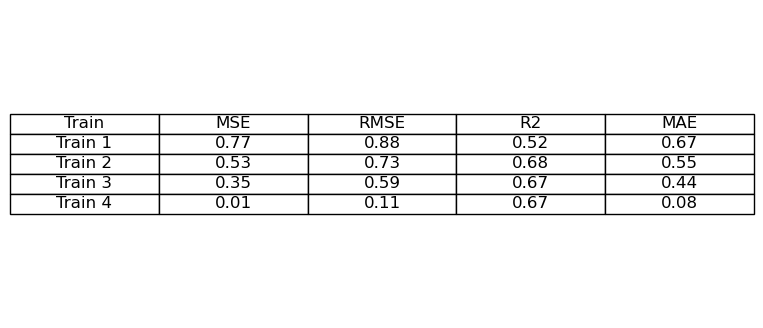

In [86]:

fig, ax = plt.subplots(figsize=(8, 4))

ax.axis('off')


formatted_df = results_df.copy()
formatted_df.iloc[:, 1:] = formatted_df.iloc[:, 1:].applymap(lambda x: f"{x:.2f}")

table = ax.table(cellText=formatted_df.values, colLabels=formatted_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  

plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/results_train.png', bbox_inches='tight', dpi=300)

plt.show()

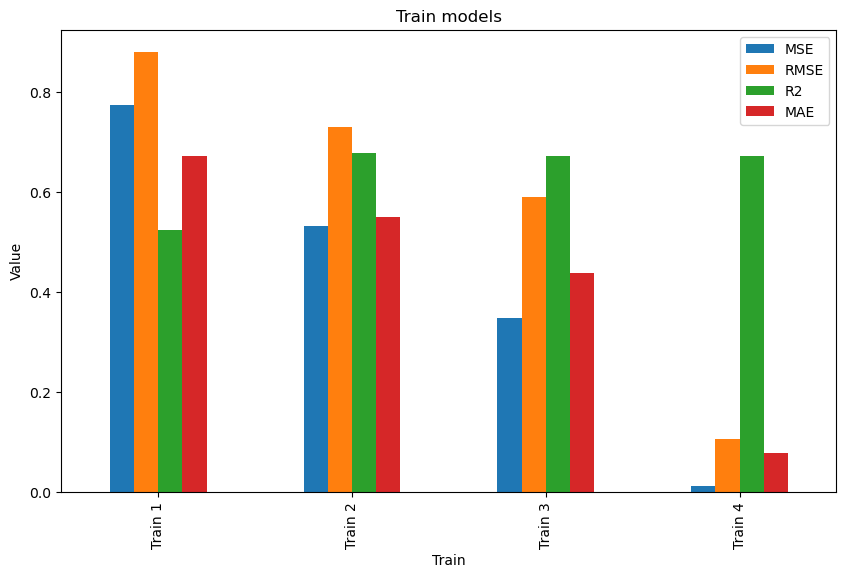

In [390]:
# Barplot
ax = results_df.plot(x="Train", kind="bar", figsize=(10, 6), title="Train models")
ax.set_ylabel("Value")

# Save the plot
plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/bar_results_train.png', bbox_inches='tight', dpi=300)

plt.show()


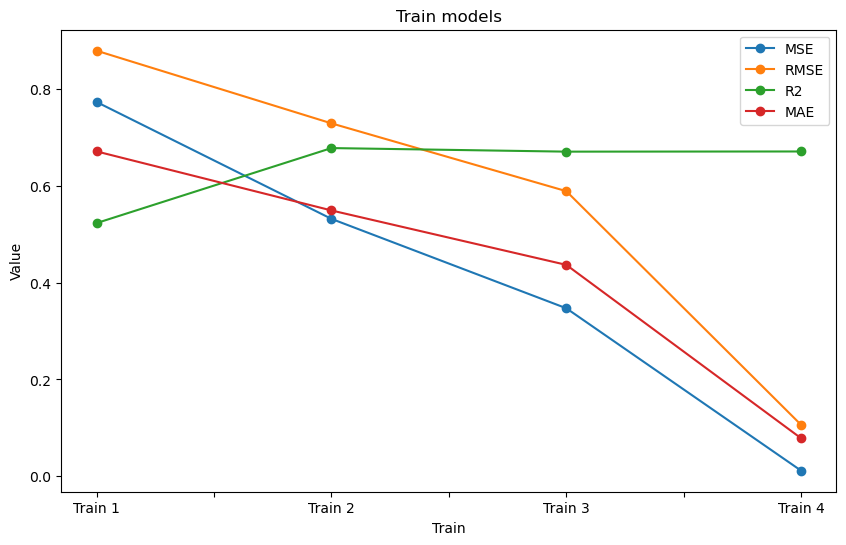

In [389]:
#Line chart
ax = results_df.plot(x="Train", kind="line", marker='o', figsize=(10, 6), title="Train models")
ax.set_ylabel("Value")

# Save the plot
plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/plot_results_train.png', bbox_inches='tight', dpi=300)

plt.show()



## 2. PREDICT CHEMPROP

### 1.1. FIRST PREDICT

Predict with curated and MinMaxScaler normalized data from ChemDiv. We perform the predict with the results of train 4. 

In [34]:
#import subprocess

#PREDICT CHEMDIV

script_path = "/Users/carlafeliu/Docs/Master/TFM/github/TFM/code/chemprop_predict_chemdiv_withmols_norm.sh"
subprocess.run(["sh", script_path])

Loading training args
Setting molecule featurization parameters to default.
Loading data


39501it [00:00, 106793.83it/s]
100%|██████████| 39501/39501 [00:00<00:00, 96374.54it/s]


Validating SMILES



100%|██████████| 1/1 [01:53<00:00, 113.04s/it]   


Saving predictions to /Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_chemdiv_withmols_norm/preds_chemdiv_withmols_norm.csv
Elapsed time = 0:02:04
Test size = 39,501
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [02:00<00:00, 120.09s/it]   


Saving predictions to /Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_chemdiv_withmols_norm/preds_chemdiv_withmols_norm.csv
Elapsed time = 0:02:11
Loading training args
Setting molecule featurization parameters to default.
Loading data


39501it [00:00, 108193.36it/s]
100%|██████████| 39501/39501 [00:00<00:00, 99521.37it/s] 


Validating SMILES
Test size = 39,501
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [02:01<00:00, 121.10s/it]   


Saving predictions to /Users/carlafeliu/Docs/Master/TFM/github/TFM/code/data_chemprop/chemp_preds_chemdiv_withmols_norm.csv
Elapsed time = 0:02:12


CompletedProcess(args=['sh', '/Users/carlafeliu/Docs/Master/TFM/github/TFM/code/chemprop_predict_chemdiv_withmols_norm.sh'], returncode=0)

In [35]:
#import pandas as pd
#Dataframe predicted from the model
df_predict_chemdiv_norm = pd.read_csv("/Users/carlafeliu/Docs/Master/TFM/github/TFM/code/data_chemprop/chemp_preds_chemdiv_withmols_norm.csv")
print(df_predict_chemdiv_norm)

                                                  SMILES        MW      logP  \
0                                   C(#Cc1cccs1)c1ccccc1  0.098477  0.346772   
1                c1ccc(C2=NC(c3ccccc3)N3C2C3c2ccccc2)cc1  0.221486  0.428765   
2      C(#Cc1ccc(C2Nc3ccccc3C(c3ccccc3)(c3ccccc3)O2)o...  0.360993  0.568539   
3                             C(#Cc1csc2ccccc12)c1ccccc1  0.147262  0.411283   
4      C(#Cc1cccc(-c2nc3ccccc3nc2-c2cccc(C#Cc3ccc(Sc4...  0.599976  0.845648   
...                                                  ...       ...       ...   
39496  CCC(C(=O)NC(CC(=O)O)C(=O)CN1CCCC1)n1cccc(NC(=O...  0.438463  0.328949   
39497  COC[C@@H]1CCCN1S(=O)(=O)c1ccc2c(c1)C(=O)C(=O)N...  0.284158  0.405409   
39498  CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(C3(C(N)=O)...  0.462888  0.463011   
39499  CC[C@@H]1OCC(=O)[C@H]1NC(=O)[C@H](CC1(C)CCCC1)...  0.433674  0.369160   
39500  Cc1ccc(NC(=O)c2ccccc2)c(=O)n1CC(=O)N[C@@H](CC(...  0.433523  0.330745   

       H-bond donor  H-bond acceptor   

In [36]:
#import pandas as pd
#Dataframe used to train the model
df_train_chemdiv = pd.read_csv("/Users/carlafeliu/Docs/Master/TFM/github/TFM/data/200mols_to_train.csv")

#The last 200 molecules of the predicted
last_200_colpredict = df_predict_chemdiv_norm.tail(200).copy

In [37]:
#from sklearn.preprocessing import MinMaxScaler

# Guardar la columna "smiles" antes de la normalización
smiles_column = df_train_chemdiv['SMILES']

# Copiar el DataFrame original sin la columna "smiles"
df_train_norm = df_train_chemdiv.drop(columns=['SMILES']).copy()

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Normalizar el DataFrame copiado
df_train_norm[df_train_norm.columns] = scaler.fit_transform(df_train_norm)

# Agregar nuevamente la columna "smiles" al DataFrame copiado normalizado
df_train_norm.insert(0, 'SMILES', smiles_column)

print(df_train_norm)

                                                SMILES        MW      logP  \
0    CC(C)[C@H](NC(=O)c1cc2cc(F)ccc2[nH]1)C(=O)N[C@...  0.721770  0.567277   
1    COc1cc2c(cc1OC)S(=O)(=O)OC(C(=O)N[C@H](C=O)Cc1...  0.305650  0.325596   
2    O=C(CF)CNC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnnc2ccc...  0.200807  0.496799   
3    CC(C)C[C@H](NC(=O)[C@H](C)NC(=O)OC(C)(C)C)C(=O...  0.391723  0.373794   
4    CCC(NC(=O)C(CC(C)C)NC(=O)OCc1ccccc1)C(=O)C(=O)...  0.569691  0.563334   
..                                                 ...       ...       ...   
195  CCC(C(=O)NC(CC(=O)O)C(=O)CN1CCCC1)n1cccc(NC(=O...  0.467780  0.451621   
196  COC[C@@H]1CCCN1S(=O)(=O)c1ccc2c(c1)C(=O)C(=O)N...  0.241088  0.561398   
197  CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(C3(C(N)=O)...  0.503663  0.644099   
198  CC[C@@H]1OCC(=O)[C@H]1NC(=O)[C@H](CC1(C)CCCC1)...  0.460744  0.509353   
199  Cc1ccc(NC(=O)c2ccccc2)c(=O)n1CC(=O)N[C@@H](CC(...  0.460523  0.454199   

     H-bond donor  H-bond acceptor  Rotatable bonds      TPSA  

Comprovem si les 200 molecules últimes del predict són igual a les 200 molecules que tenim de referència

In [38]:
#import pandas as pd

last_200_colpredict_norm = df_predict_chemdiv_norm.tail(200).copy()
last_200_colpredict_norm.reset_index(drop=True, inplace=True)

print(last_200_colpredict_norm)

                                                SMILES        MW      logP  \
0    CC(C)[C@H](NC(=O)c1cc2cc(F)ccc2[nH]1)C(=O)N[C@...  0.611349  0.409504   
1    COc1cc2c(cc1OC)S(=O)(=O)OC(C(=O)N[C@H](C=O)Cc1...  0.328105  0.241173   
2    O=C(CF)CNC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnnc2ccc...  0.256740  0.360416   
3    CC(C)C[C@H](NC(=O)[C@H](C)NC(=O)OC(C)(C)C)C(=O...  0.386693  0.274743   
4    CCC(NC(=O)C(CC(C)C)NC(=O)OCc1ccccc1)C(=O)C(=O)...  0.507832  0.406758   
..                                                 ...       ...       ...   
195  CCC(C(=O)NC(CC(=O)O)C(=O)CN1CCCC1)n1cccc(NC(=O...  0.438463  0.328949   
196  COC[C@@H]1CCCN1S(=O)(=O)c1ccc2c(c1)C(=O)C(=O)N...  0.284158  0.405409   
197  CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(C3(C(N)=O)...  0.462888  0.463011   
198  CC[C@@H]1OCC(=O)[C@H]1NC(=O)[C@H](CC1(C)CCCC1)...  0.433674  0.369160   
199  Cc1ccc(NC(=O)c2ccccc2)c(=O)n1CC(=O)N[C@@H](CC(...  0.433523  0.330745   

     H-bond donor  H-bond acceptor      TPSA  Rotatable bonds  

In [39]:
#import pandas as pd

df_train_norm = df_train_norm.reset_index(drop=True)
last_200_colpredict_norm = last_200_colpredict_norm.reset_index(drop=True)

equals = df_train_norm['SMILES'].equals(last_200_colpredict_norm['SMILES'])

if equals:
    print("The smiles column of both dataframes is the same")
else:
    print("The smiles column of both dataframes is not the same")


The smiles column of both dataframes is the same


Compare the predicted results versus the real results

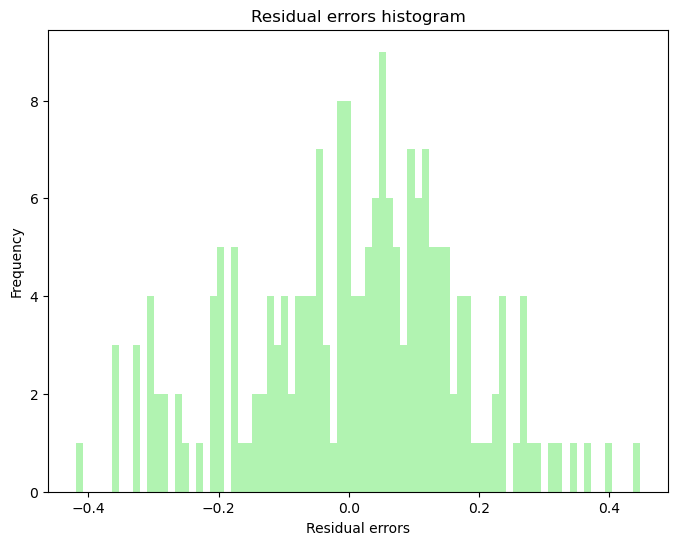

In [90]:
#import pandas as pd
#import matplotlib.pyplot as plt

#Train: df_train_nrom
#Predict: last_200_colpredict_norm

#Residual errors
errors = df_train_norm['pchembl_value'] - last_200_colpredict_norm['pchembl_value'] 

# Histogram
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.hist(errors, bins=80, color='lightgreen', alpha=0.7)  


plt.xlabel('Residual errors')
plt.ylabel('Frequency')
plt.title('Residual errors histogram')

plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/residual_error_predict_chemdiv.png')

plt.show()

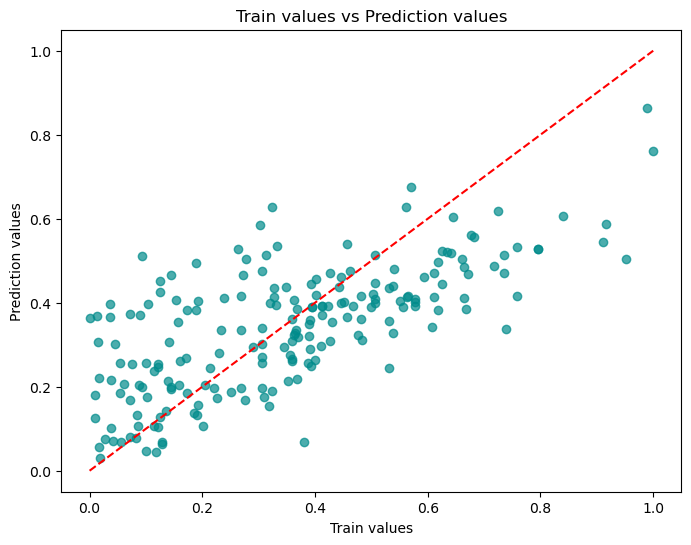

In [43]:
#import pandas as pd
#import matplotlib.pyplot as plt

#Train: df_train_chemdiv[
#Predict: last_200_colpredict

# Dispersion
plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Train values x & prediction values y
plt.scatter(df_train_norm['pchembl_value'], last_200_colpredict_norm['pchembl_value'], color='darkcyan', alpha=0.7)


plt.xlabel('Train values')
plt.ylabel('Prediction values')
plt.title('Train values vs Prediction values')

# Linear regression
plt.plot([min(df_train_norm['pchembl_value']), max(df_train_norm['pchembl_value'])],
         [min(df_train_norm['pchembl_value']), max(df_train_norm['pchembl_value'])], color='red', linestyle='--')

plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/linregresion_predict_chemdiv.png')
plt.show()


In [44]:
# Get only numerical columns
numerical_columns = \
list(last_200_colpredict_norm.dtypes[last_200_colpredict_norm.dtypes == 'float64'].index)

len(numerical_columns)

11

Busquem els resultats amb un valor més gran de 0,5 que voldrá dir, que amb la normalització MinMaxScaler tenen un pvalor mes alt

In [45]:
df_predict_chemdiv_norm_or = df_predict_chemdiv_norm.sort_values(by='pchembl_value', ascending=False)
print(df_predict_chemdiv_norm_or)

                                                  SMILES        MW      logP  \
39422  CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...  0.419910  0.296906   
39431  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.369208  0.334454   
39486  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.295815  0.276790   
39345  CCCC[C@H](NC(=O)O[C@H](Cn1cnc(-c2ccc(C(F)(F)F)...  0.478473  0.499127   
39487  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.621141  0.441044   
...                                                  ...       ...       ...   
6701                                        Nc1nnc(Br)s1  0.093484  0.220060   
17509                        CS(=O)(=O)N(CCCl)S(C)(=O)=O  0.148163  0.139707   
6932                                          N#CCC(N)=O  0.000935  0.136293   
25825                                    CCS(=O)(=O)CCBr  0.114001  0.216324   
7008                                        N=c1nc(S)ss1  0.065219  0.225093   

       H-bond donor  H-bond acceptor   

In [46]:
# Results with higher pvalue
sig_res_predict_chemdiv_norm = df_predict_chemdiv_norm[df_predict_chemdiv_norm['pchembl_value'] >= 0.5].copy()
sig_res_predict_chemdiv_norm.reset_index(drop=True, inplace=True)

print(sig_res_predict_chemdiv_norm)

                                                SMILES        MW      logP  \
0    O=C1CS(=O)(=O)C2(C(=O)N(Cc3ccccc3)c3ccccc32)N1...  0.359907  0.366536   
1    O=C1CS(=O)(=O)C2(C(=O)N(Cc3ccccc3)c3ccccc32)N1...  0.344330  0.337766   
2    O=C1CS(=O)(=O)C2(C(=O)N(Cc3ccccc3)c3ccccc32)N1...  0.344330  0.337766   
3    O=C1CS(=O)(=O)C2(C(=O)N(Cc3ccccc3)c3ccccc32)N1...  0.359907  0.366536   
4    O=C1CS(=O)(=O)C2(C(=O)N(Cc3ccccc3)c3ccccc32)N1...  0.402775  0.372639   
..                                                 ...       ...       ...   
189  CCCC[C@H](NC(=O)O[C@H](Cn1ccc(-c2ccc(C(F)(F)F)...  0.587972  0.461335   
190  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.318384  0.387004   
191  O=C(NC1CC1)C(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H]1C...  0.551620  0.391262   
192  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.295815  0.276790   
193  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.621141  0.441044   

     H-bond donor  H-bond acceptor      TPSA  Rotatable bonds  

In [47]:
print("Predict dataset information:")
df_predict_chemdiv_norm.info()


print("Filtered predict dataset information:")
sig_res_predict_chemdiv_norm.info()

Predict dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39501 entries, 0 to 39500
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SMILES              39501 non-null  object 
 1   MW                  39501 non-null  float64
 2   logP                39501 non-null  float64
 3   H-bond donor        39501 non-null  float64
 4   H-bond acceptor     39501 non-null  float64
 5   TPSA                39501 non-null  float64
 6   Rotatable bonds     39501 non-null  float64
 7   Ring counts         39501 non-null  float64
 8   Heavy atoms counts  39501 non-null  float64
 9   Fraction CSP3       39501 non-null  float64
 10  Balaban J Index     39501 non-null  float64
 11  pchembl_value       39501 non-null  float64
dtypes: float64(11), object(1)
memory usage: 3.6+ MB
Filtered predict dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns 

In [48]:
# Get only numerical columns
numerical_columns = \
list(sig_res_predict_chemdiv_norm.dtypes[sig_res_predict_chemdiv_norm.dtypes == 'float64'].index)

len(numerical_columns)

11

Hem passat de tenir X a tenir X

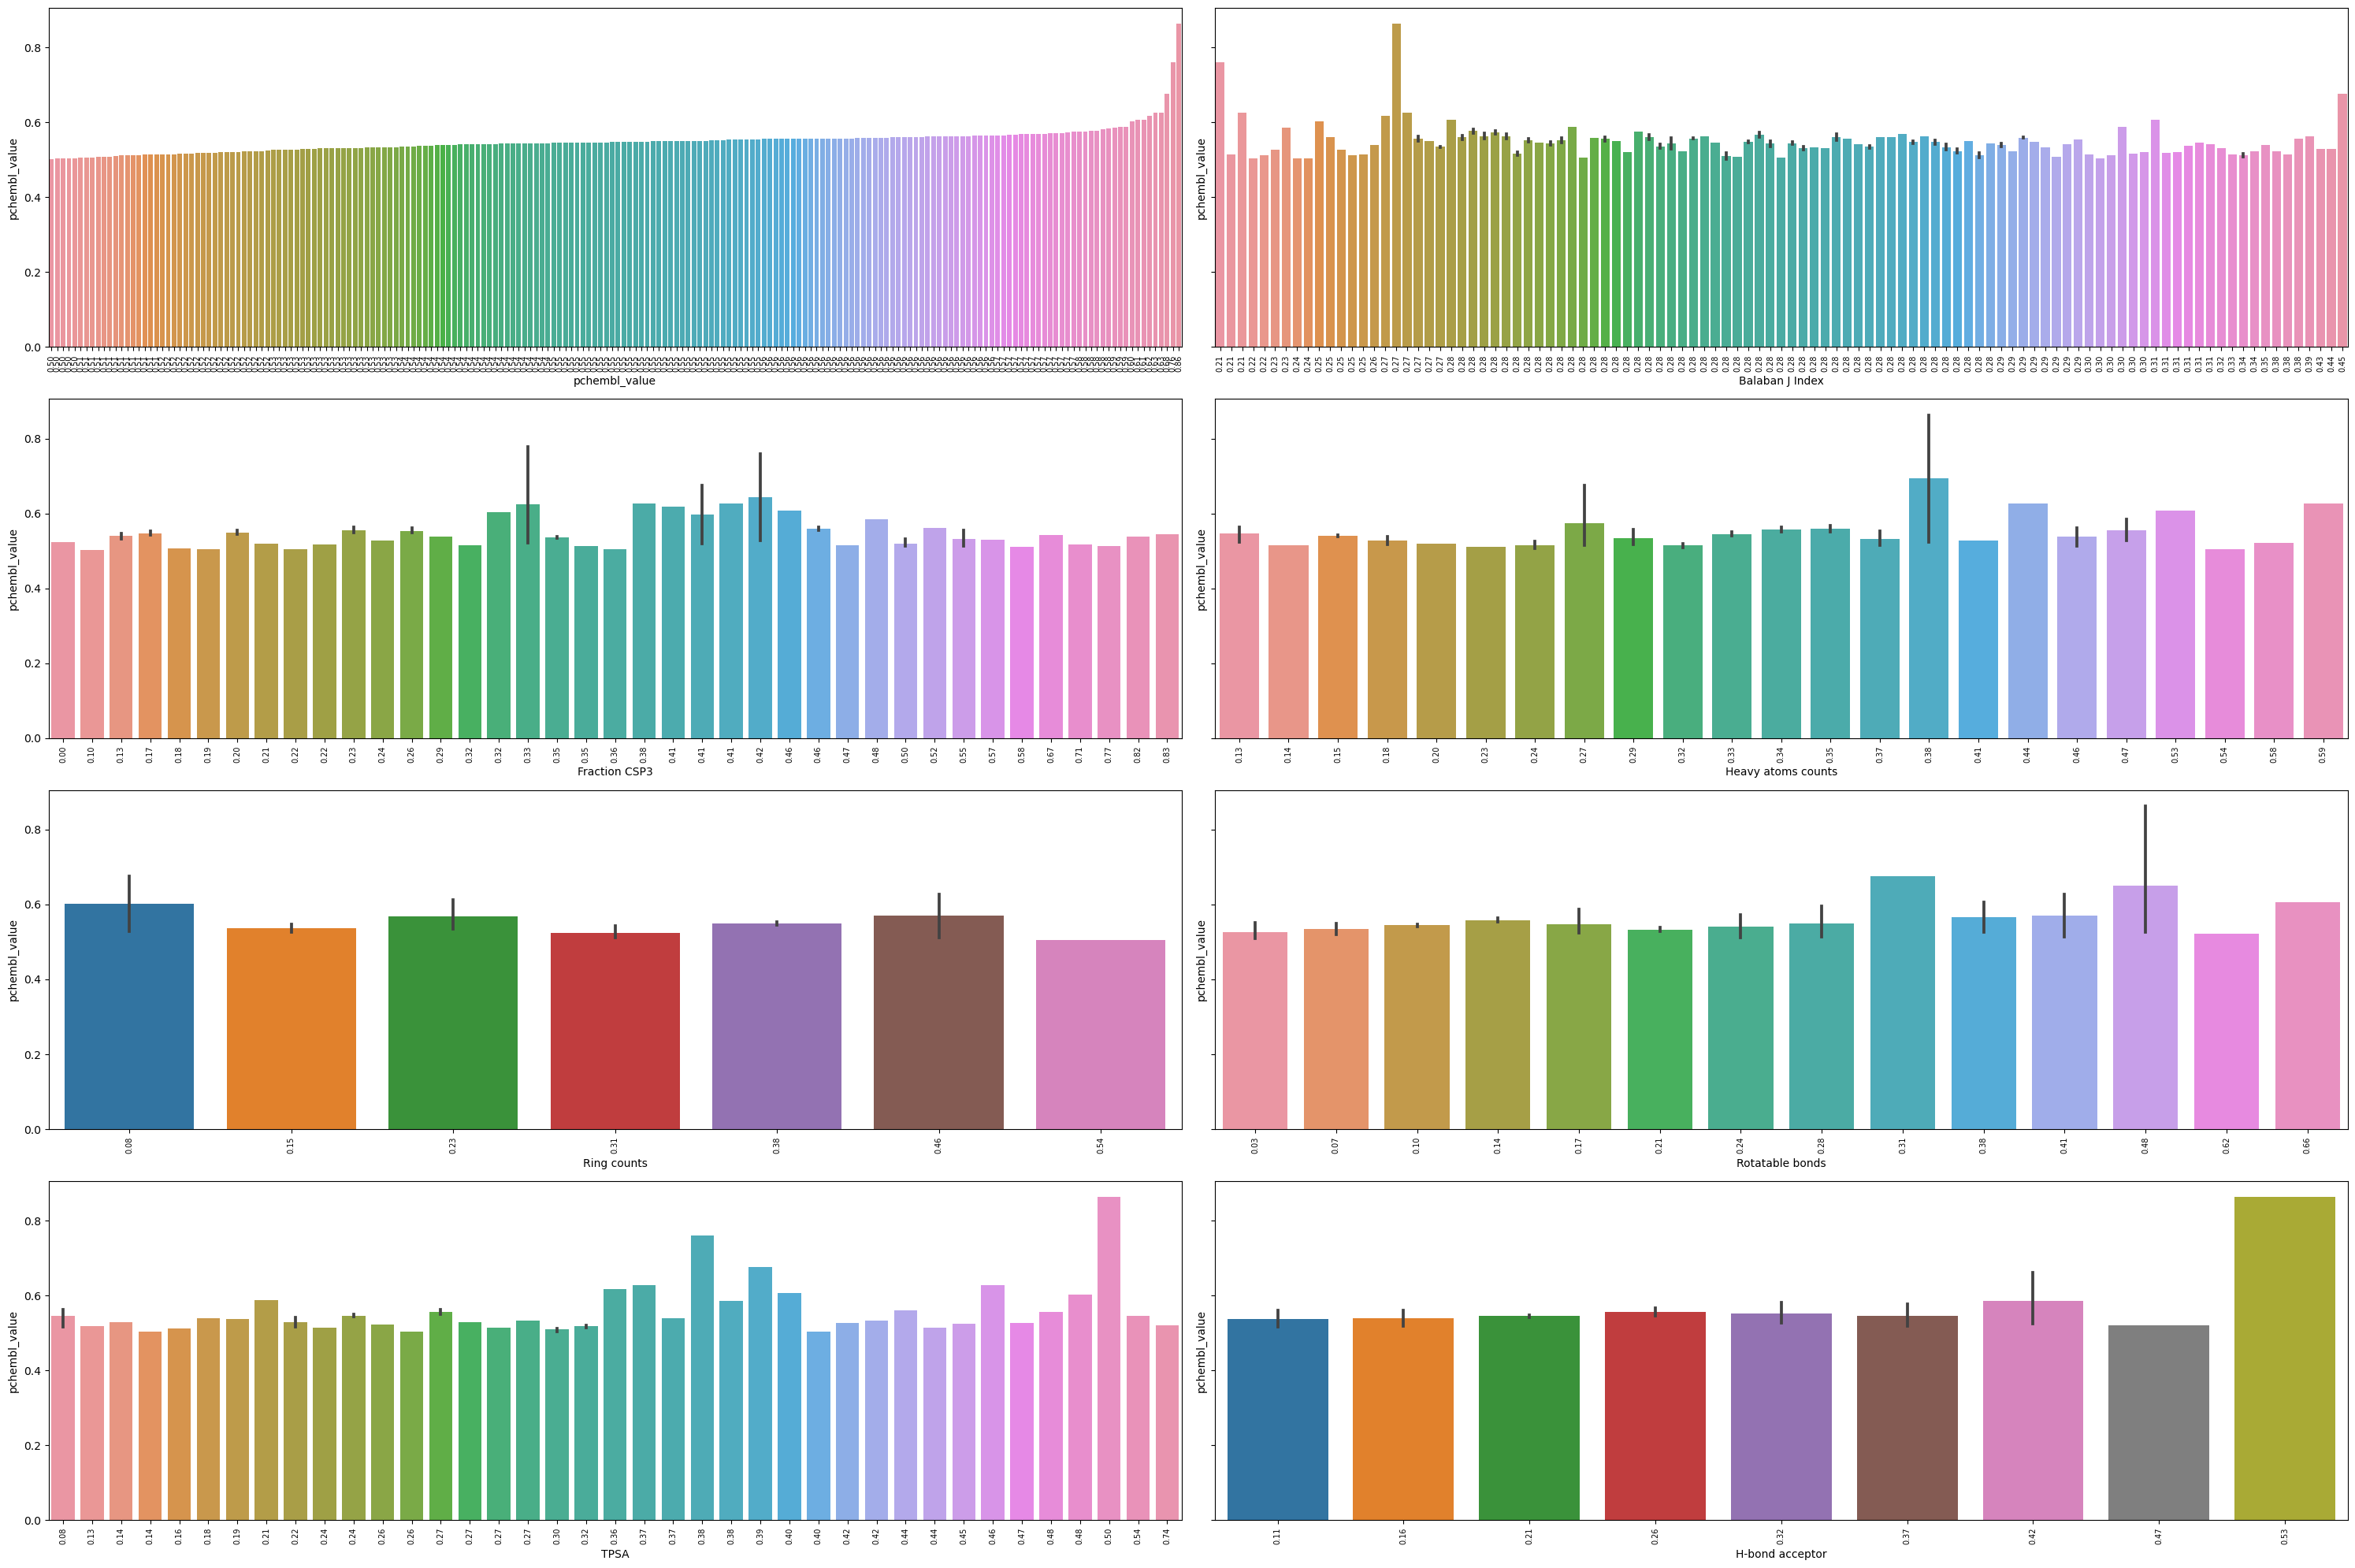

In [51]:
#Barplot description for every feature with pchembl_value
cols = list(sig_res_predict_chemdiv_norm.dtypes[sig_res_predict_chemdiv_norm.dtypes == 'float64'].index)
f, axes = plt.subplots(4, 2, figsize=(30, 20), sharey=True)

for r in range(4):
    for c in range(2):
        ax = sns.barplot(x=cols.pop(), y="pchembl_value", \
        data=sig_res_predict_chemdiv_norm, ax=axes[r][c])

        etiq = [label.get_text() for label in ax.get_xticklabels()]
        etiq_form = ['{:.2f}'.format(float(etiqueta)) for etiqueta in etiq]
        ax.set_xticklabels(etiq_form, rotation=90, fontsize=7)

plt.tight_layout()

plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/barplot_matrix_predict_chemdiv.png')
plt.show()

In [52]:
sig_res_predict_chemdiv_norm_num = sig_res_predict_chemdiv_norm.copy()
sig_res_predict_chemdiv_norm_num = sig_res_predict_chemdiv_norm_num.drop("SMILES", axis=1)

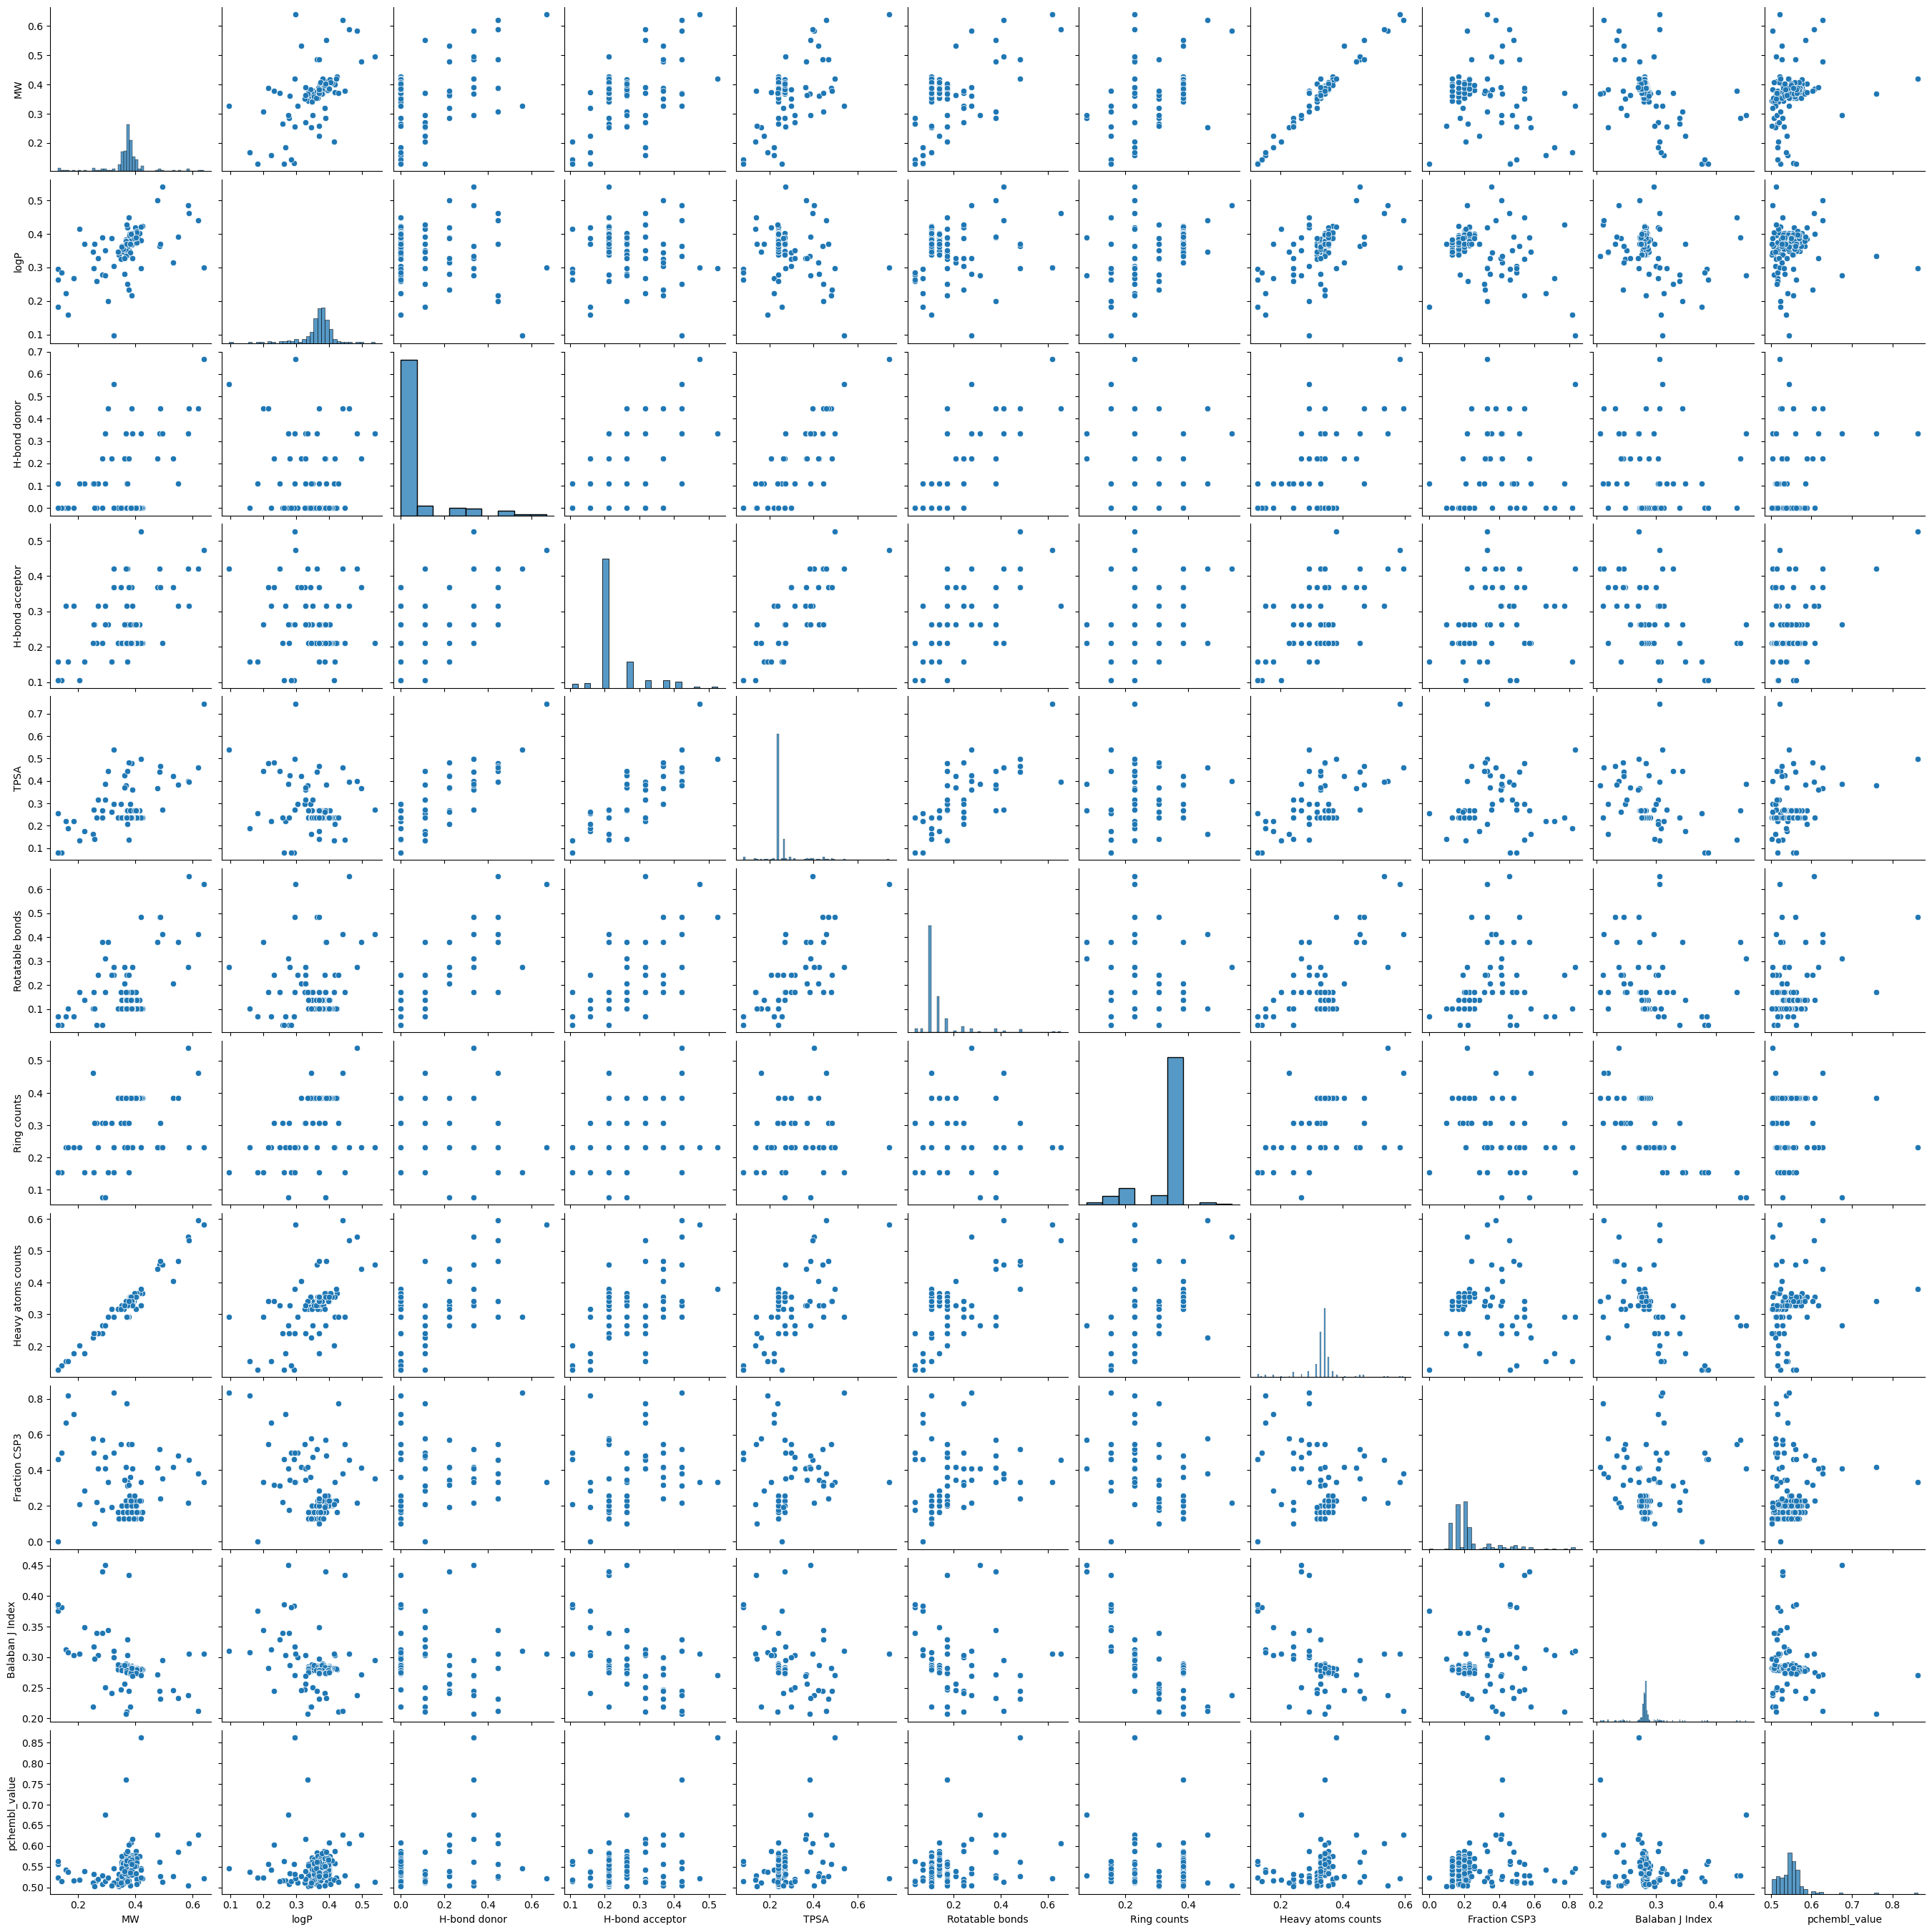

In [53]:
sns.pairplot(sig_res_predict_chemdiv_norm_num)
plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/pairplot_matrix_predict_chemdiv.png')
plt.show()

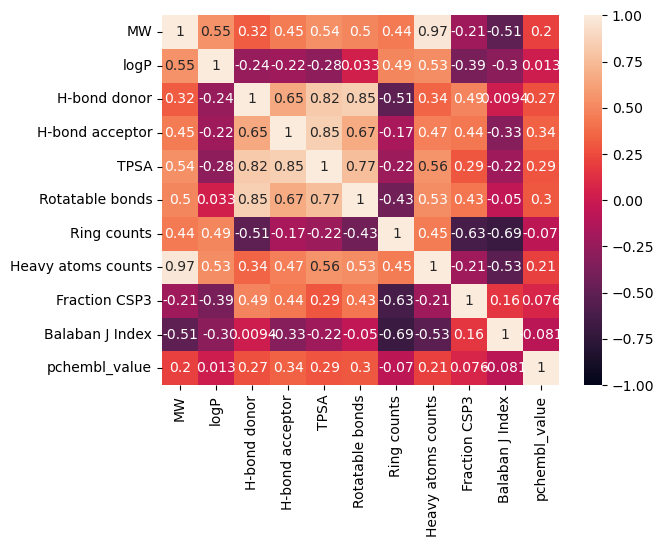

In [54]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

sns.heatmap(sig_res_predict_chemdiv_norm_num.corr(), annot=True, vmin=-1, vmax=1)
plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/heatmap_predict_chemdiv.png')

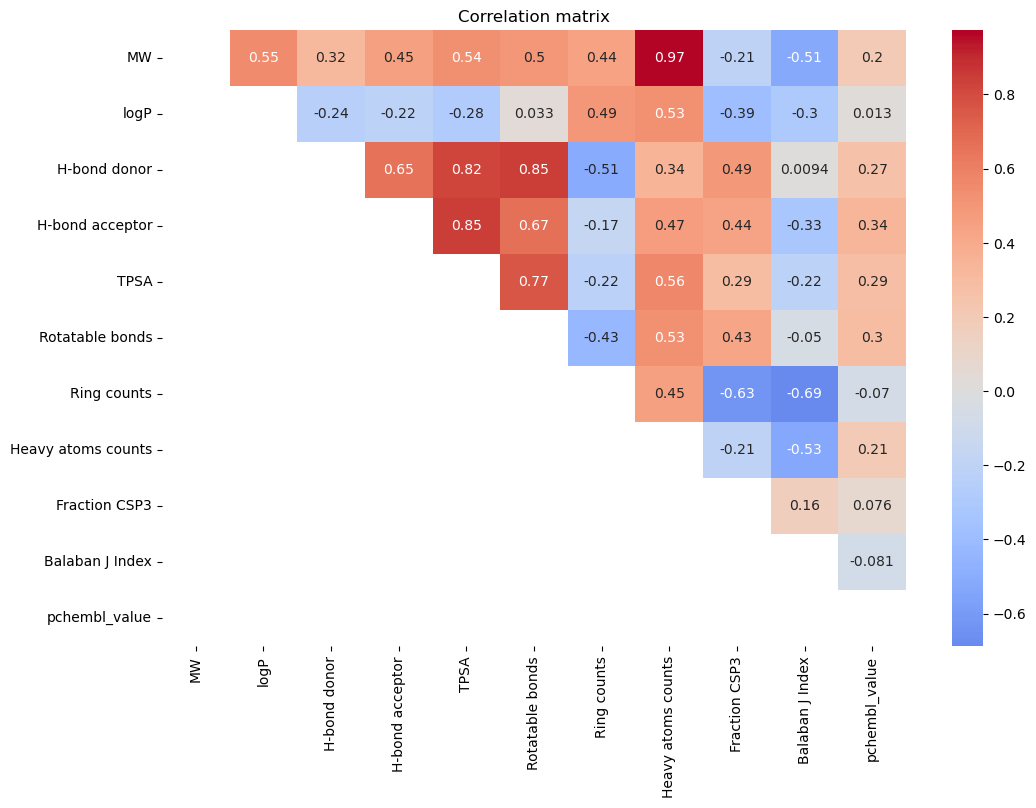

In [55]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

#Matrix correlation
correlation_matrix = sig_res_predict_chemdiv_norm_num.corr()

# Only upper half
mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))


plt.figure(figsize=(12, 8))

#Heatmap
sns.heatmap(mask, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation matrix')
plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/migheatmap_predict_chemdiv.png')
plt.show()

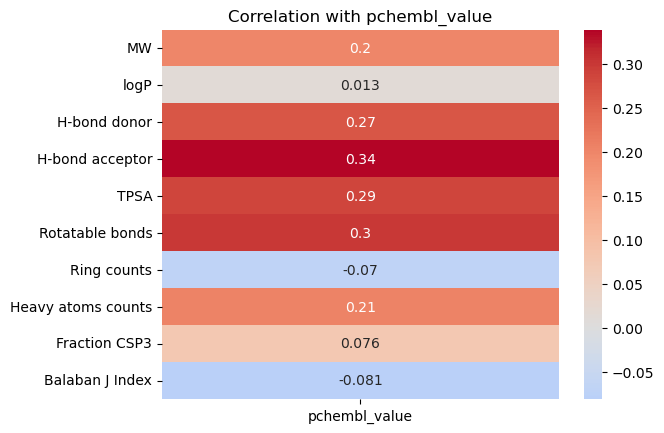

In [56]:
pchembl_corr = correlation_matrix['pchembl_value'].drop('pchembl_value')
sns.heatmap(pchembl_corr.to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title('Correlation with pchembl_value')

plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/cor_plot3_pchembl_predict_chemdiv.png')

### 1.2. SECOND PREDICT

Predict with curated and MinMaxScaler normalized data from Zinc. We perform the predict with the results of train 4. 

In [412]:
#import subprocess

#PREDICT ZINC

script_path = "/Users/carlafeliu/Docs/Master/TFM/github/TFM/code/chemprop_predict_zinc_norm.sh"
subprocess.run(["sh", script_path])

Loading training args
Setting molecule featurization parameters to default.
Loading data


87476it [00:00, 97593.84it/s] 
100%|██████████| 87476/87476 [00:00<00:00, 96805.54it/s] 


Validating SMILES
Test size = 87,476
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [03:16<00:00, 196.62s/it]     


Saving predictions to /Users/carlafeliu/Docs/Master/TFM/github/TFM/df_checkpoint_zinc_norm/preds_zinc_norm.csv
Elapsed time = 0:03:44
Loading training args
Setting molecule featurization parameters to default.
Loading data


87476it [00:00, 103382.93it/s]
100%|██████████| 87476/87476 [00:00<00:00, 96981.13it/s] 


Validating SMILES
Test size = 87,476
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [03:14<00:00, 194.10s/it]     


Saving predictions to /Users/carlafeliu/Docs/Master/TFM/github/TFM/code/data_chemprop/chemp_preds_zinc_norm.csv
Elapsed time = 0:03:38


CompletedProcess(args=['sh', '/Users/carlafeliu/Docs/Master/TFM/github/TFM/code/chemprop_predict_zinc_norm.sh'], returncode=0)

In [57]:
#Dataframe predicted from the model
df_predict_zinc_norm = pd.read_csv("/Users/carlafeliu/Docs/Master/TFM/github/TFM/code/data_chemprop/chemp_preds_zinc_norm.csv")

print(df_predict_zinc_norm)

                                                  SMILES        MW      logP  \
0       COc1ccc(O)c([C@H](C)NC(=O)C[C@@H](C)c2ccccc2F)c1  0.146447  0.482010   
1                CN(Cc1ccccc1O)C(=O)c1cc(Cc2ccccc2)ccc1O  0.159400  0.485662   
2      COc1ccc(O)c(CNC(=O)[C@@H]2C[C@@H]2c2ccc3ccccc3...  0.159400  0.486621   
3                         O=C(NCc1ccccc1O)c1cc(Br)ccc1Cl  0.153896  0.469365   
4          COc1ccc(O)c([C@@H](C)NC(=O)CCOc2cccc(Cl)c2)c1  0.161340  0.466613   
...                                                  ...       ...       ...   
87471  CC(=O)OCCN1C(=O)c2c(-c3ccco3)nc3ccc(S(=O)(=O)N...  0.255983  0.628009   
87472           CCCC[C@@H](C=O)NC(=O)O[C@@H](C)Cc1ccccc1  0.268226  0.468830   
87473  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)Cn1cnc...  0.585819  0.626164   
87474  CCOC(=O)[C@H]1[C@H](C(=O)OCC)N1C(=O)[C@@H]1CCN...  0.145603  0.391067   
87475  CC(C)c1nc(CN(C)C(=O)N[C@H](C(=O)N[C@H](CC[C@H]...  0.244370  0.426370   

       H-bond donor  H-bond acceptor  R

In [58]:
df_predict_zinc_norm.isna().sum().sort_values()

SMILES                0
MW                    0
logP                  0
H-bond donor          0
H-bond acceptor       0
Rotatable bonds       0
TPSA                  0
Ring counts           0
Heavy atoms counts    0
Fraction CSP3         0
Balaban J Index       0
pchembl_value         0
dtype: int64

In [59]:
# Get only numerical columns
numerical_columns = \
list(df_predict_zinc_norm.dtypes[df_predict_zinc_norm.dtypes == 'float64'].index)

len(numerical_columns)

11

Filtrem mes alt de 0,5

In [60]:
# Filtrar los resultados con pchembl_value significativo
sig_res_predict_zinc_norm = df_predict_zinc_norm[df_predict_zinc_norm['pchembl_value'] >= 0.5].copy()
sig_res_predict_zinc_norm.reset_index(drop=True, inplace=True)
# Mostrar el nuevo DataFrame con resultados significativos
print(sig_res_predict_zinc_norm)

                                               SMILES        MW      logP  \
0   C[C@H](NC(=O)N1C[C@@H](C2CC2)[C@@H]1C1CC1)c1cc...  0.143283  0.462449   
1    Cc1cc(N(C)C)ccc1CNC(=O)N[C@@H](C(C)(C)C)C(F)(F)F  0.157780  0.476618   
2      CCCC[C@@H]1NC(=O)N(Cc2ccc(N3CCC(C)CC3)cc2)C1=O  0.156213  0.454392   
3           Cc1[nH]ncc1CCCN[C@H](C)c1ccc(N2CCCCC2)cc1  0.142488  0.487932   
4       Cc1cc(N(C)C)ccc1CNC(=O)N1CC2(CCC2)[C@H]1C(C)C  0.144912  0.472513   
..                                                ...       ...       ...   
92  Cc1nn(C)c2ccc(N3CCN(C(=O)[C@@H]4CCCC[C@H]4C(=O...  0.260582  0.349923   
93  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.256525  0.421590   
94  CC[C@H](NC(=O)[C@@H]1C[C@@H](S(=O)(=O)c2ccccc2...  0.504360  0.360967   
95  CC(=O)N[C@H](CS(=O)(=O)c1ccc(F)cc1)C(=O)N[C@@H...  0.260567  0.498102   
96           CCCC[C@@H](C=O)NC(=O)O[C@@H](C)Cc1ccccc1  0.268226  0.468830   

    H-bond donor  H-bond acceptor  Rotatable bonds      TPSA  Ring counts  

In [61]:
print("Predict dataset information:")
df_predict_zinc_norm.info()


print("Filtered predict dataset information:")
sig_res_predict_zinc_norm.info()

Predict dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87476 entries, 0 to 87475
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SMILES              87476 non-null  object 
 1   MW                  87476 non-null  float64
 2   logP                87476 non-null  float64
 3   H-bond donor        87476 non-null  float64
 4   H-bond acceptor     87476 non-null  float64
 5   Rotatable bonds     87476 non-null  float64
 6   TPSA                87476 non-null  float64
 7   Ring counts         87476 non-null  float64
 8   Heavy atoms counts  87476 non-null  float64
 9   Fraction CSP3       87476 non-null  float64
 10  Balaban J Index     87476 non-null  float64
 11  pchembl_value       87476 non-null  float64
dtypes: float64(11), object(1)
memory usage: 8.0+ MB
Filtered predict dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (t

Hem passat de tenir-ne X a quedar-nos amb X

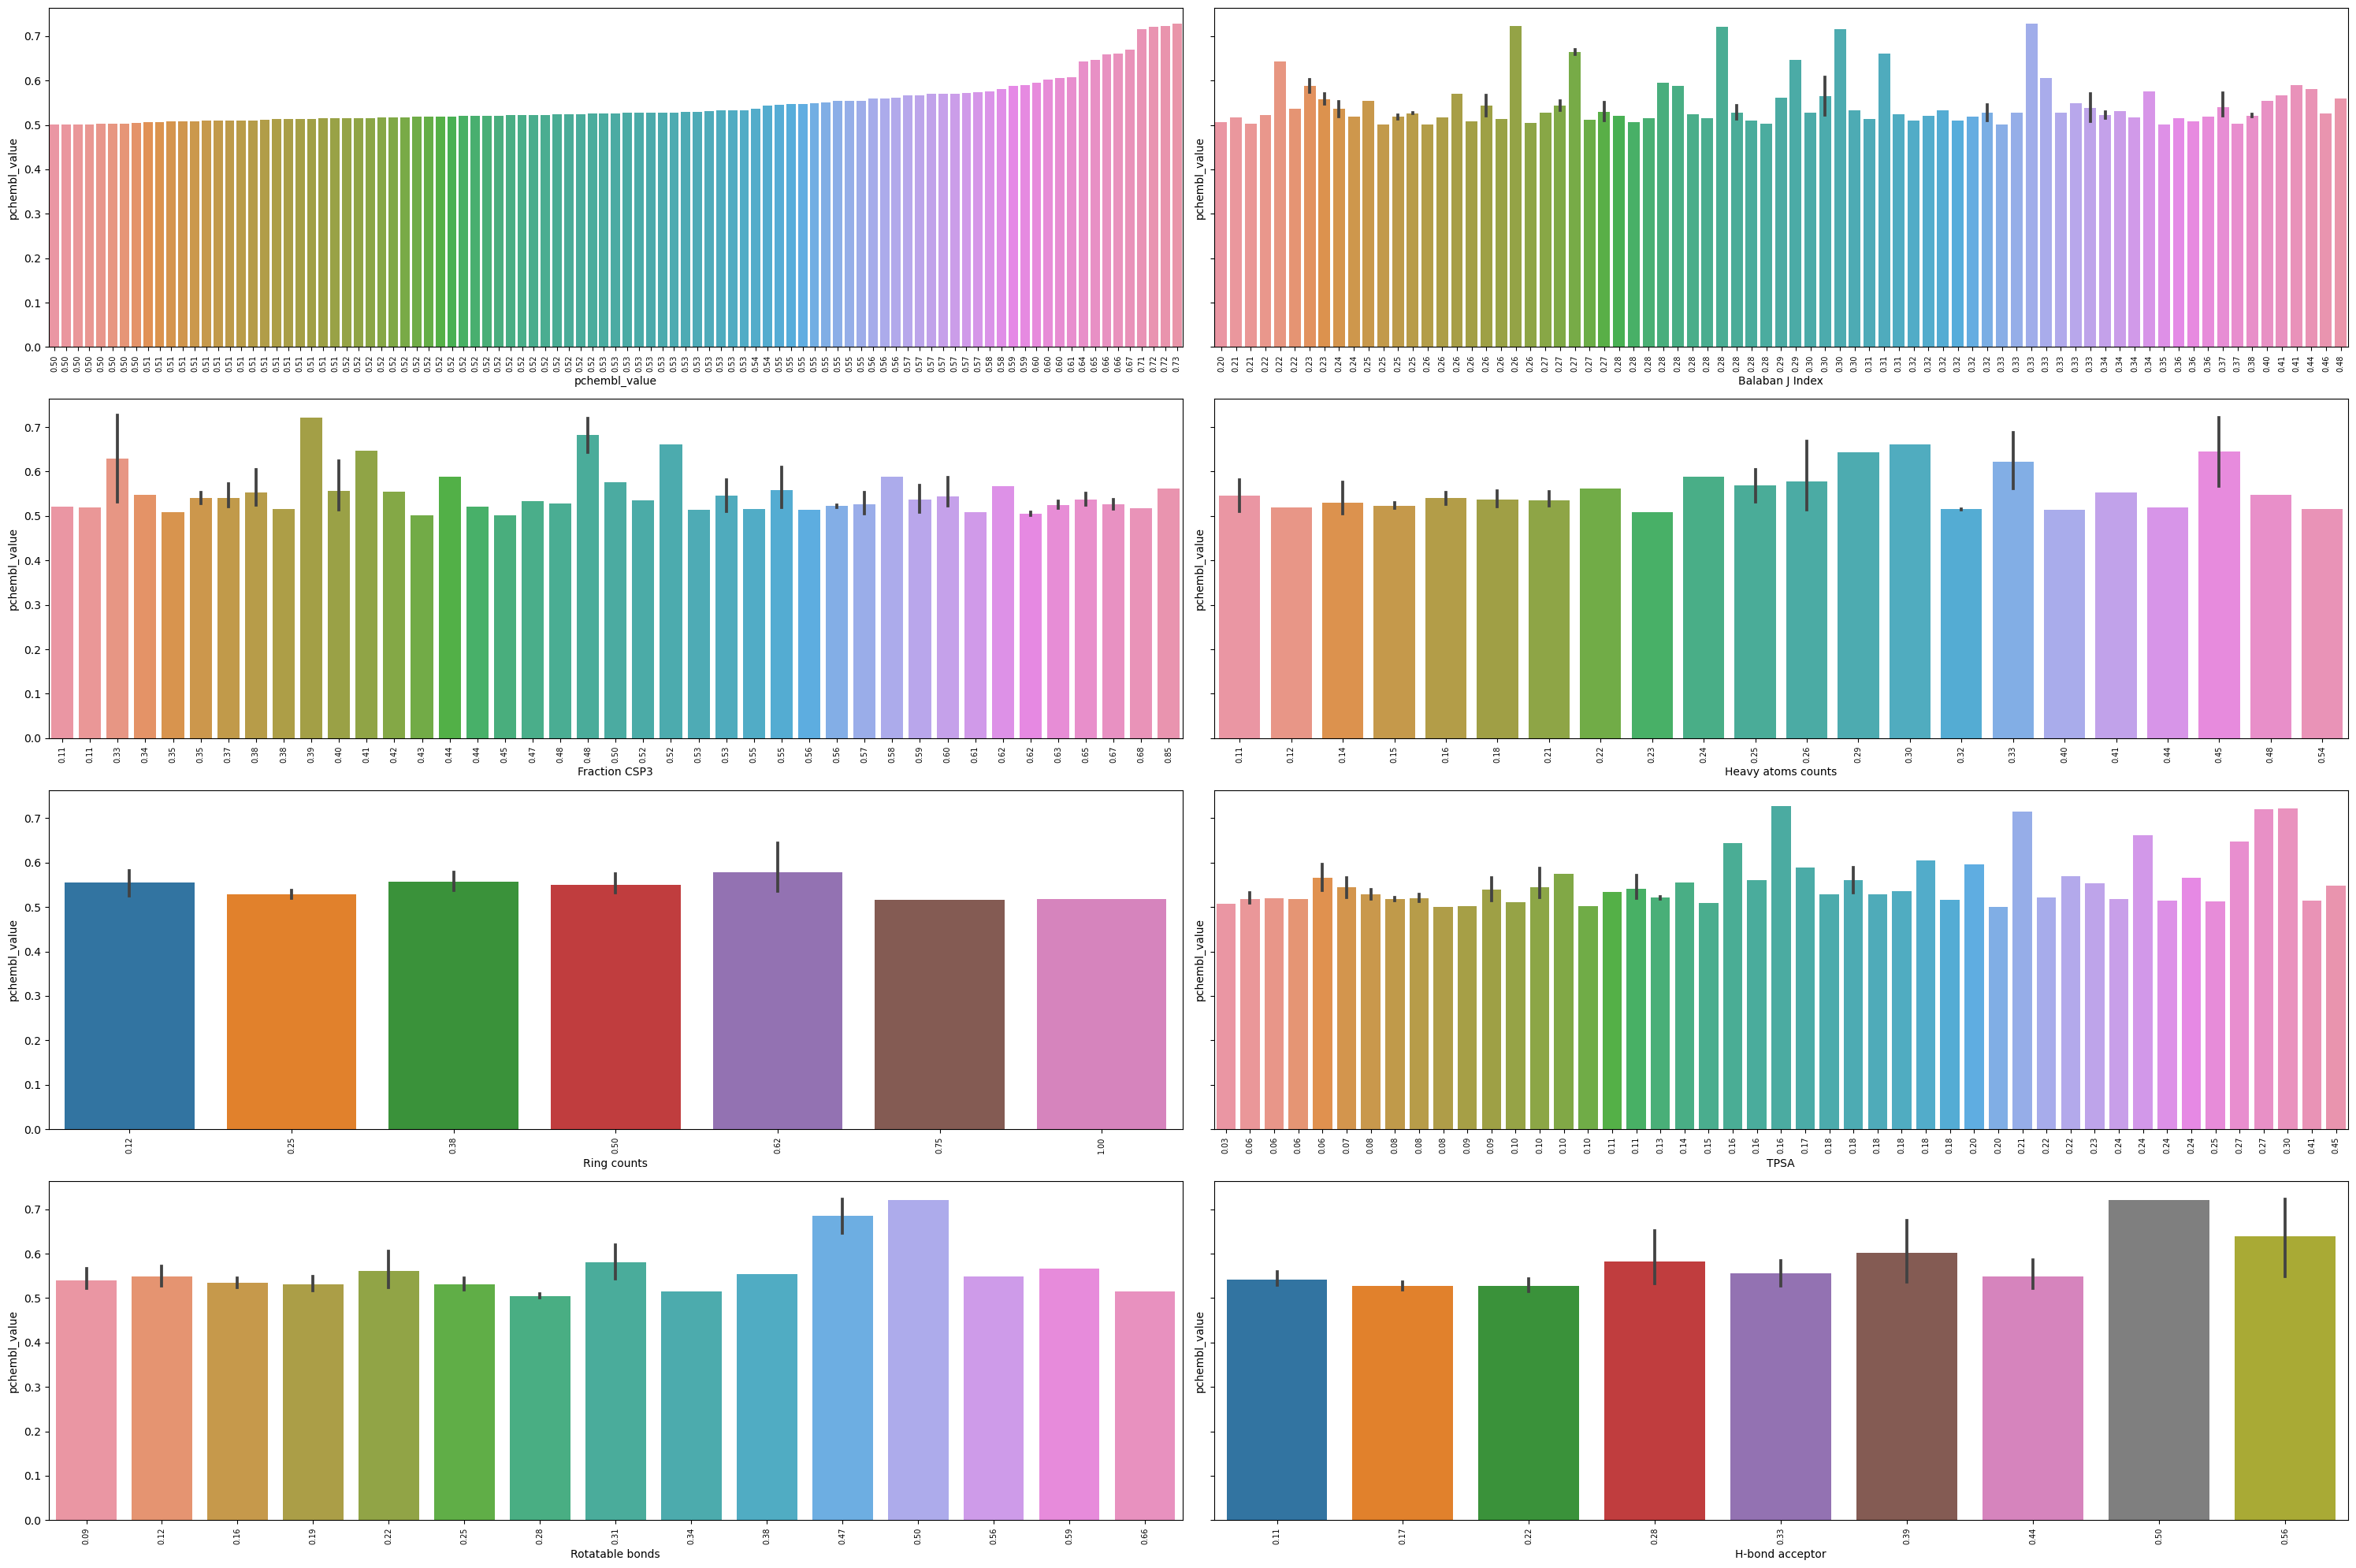

In [62]:
#Barplot description for every feature with pchembl_value
cols = list(sig_res_predict_zinc_norm.dtypes[sig_res_predict_zinc_norm.dtypes == 'float64'].index)
f, axes = plt.subplots(4, 2, figsize=(30, 20), sharey=True)

for r in range(4):
    for c in range(2):
        ax = sns.barplot(x=cols.pop(), y="pchembl_value", \
        data=sig_res_predict_zinc_norm, ax=axes[r][c])

        etiq = [label.get_text() for label in ax.get_xticklabels()]
        etiq_form = ['{:.2f}'.format(float(etiqueta)) for etiqueta in etiq]
        ax.set_xticklabels(etiq_form, rotation=90, fontsize=7)

plt.tight_layout()

plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/barplot_matrix_predict_zinc.png')
plt.show()

In [63]:
sig_res_predict_zinc_norm_num = sig_res_predict_zinc_norm.copy()
sig_res_predict_zinc_norm_num = sig_res_predict_zinc_norm_num.drop("SMILES", axis=1)

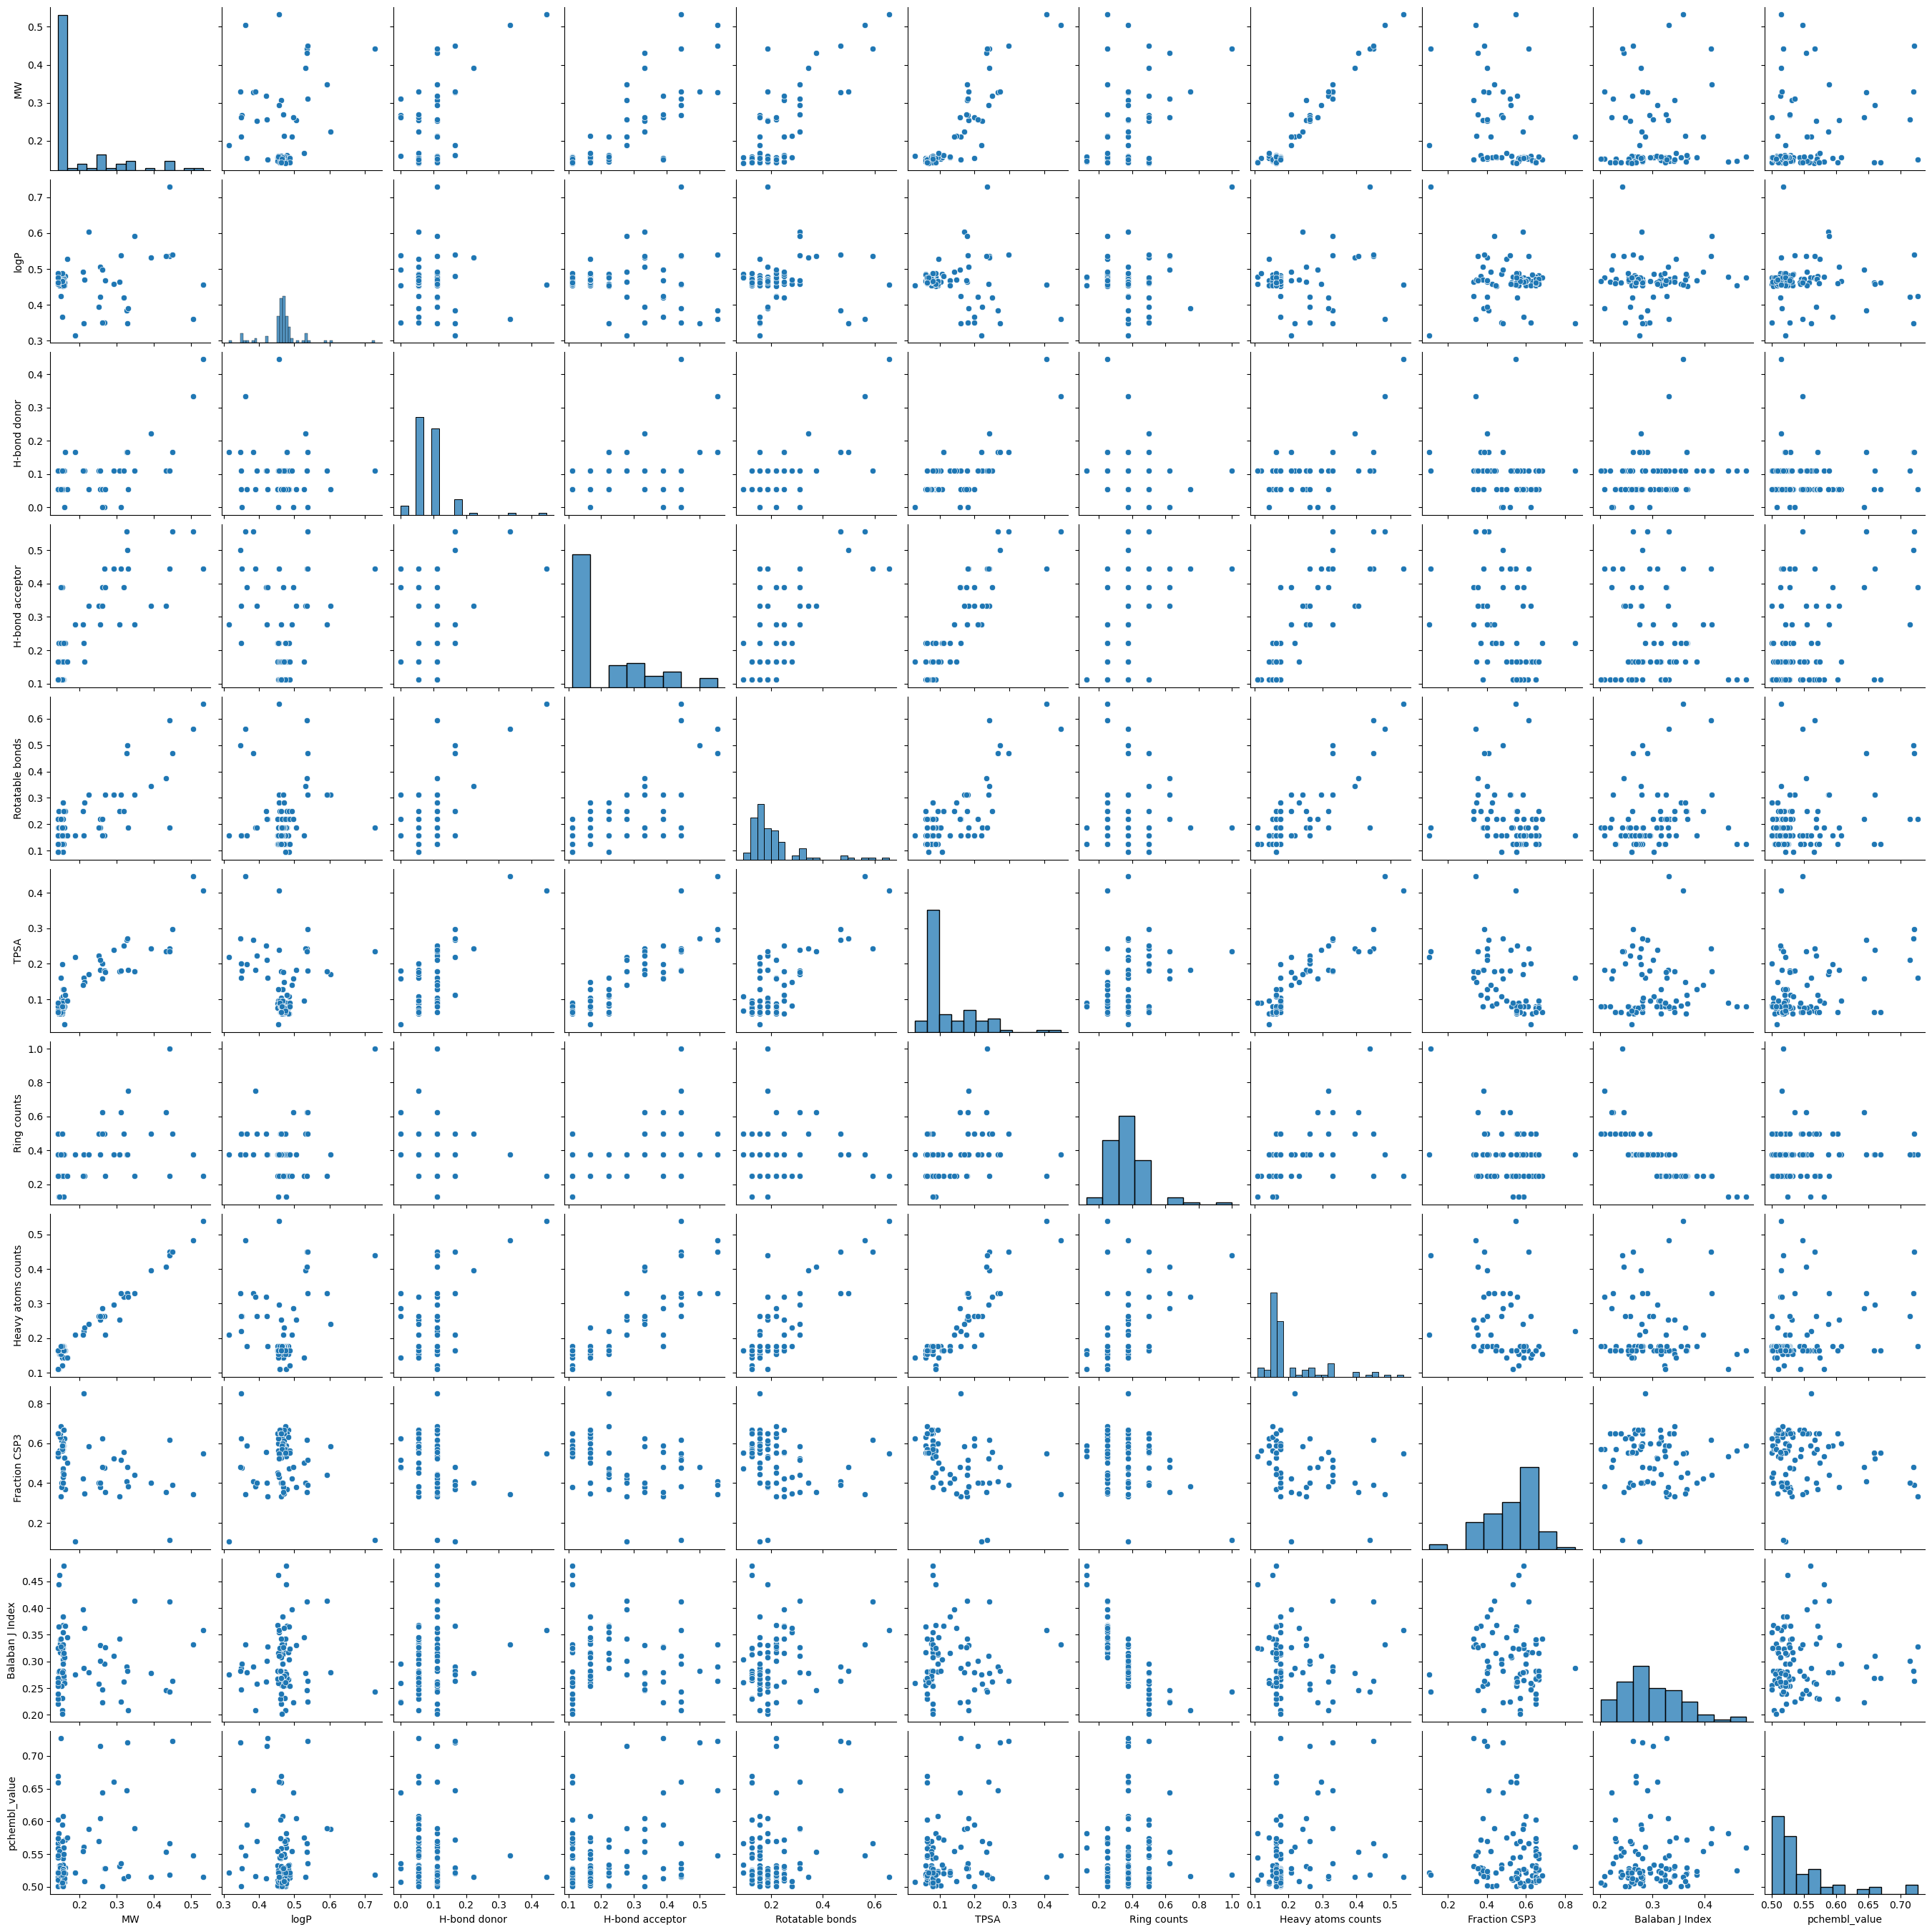

In [64]:
sns.pairplot(sig_res_predict_zinc_norm_num)
plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/pairplot_matrix_predict_zinc.png')
plt.show()

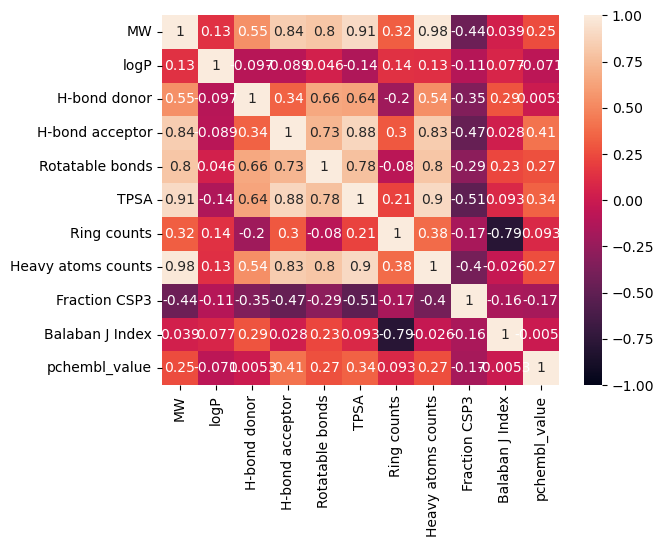

In [65]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

sns.heatmap(sig_res_predict_zinc_norm_num.corr(), annot=True, vmin=-1, vmax=1)
plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/heatmap_predict_zinc.png')

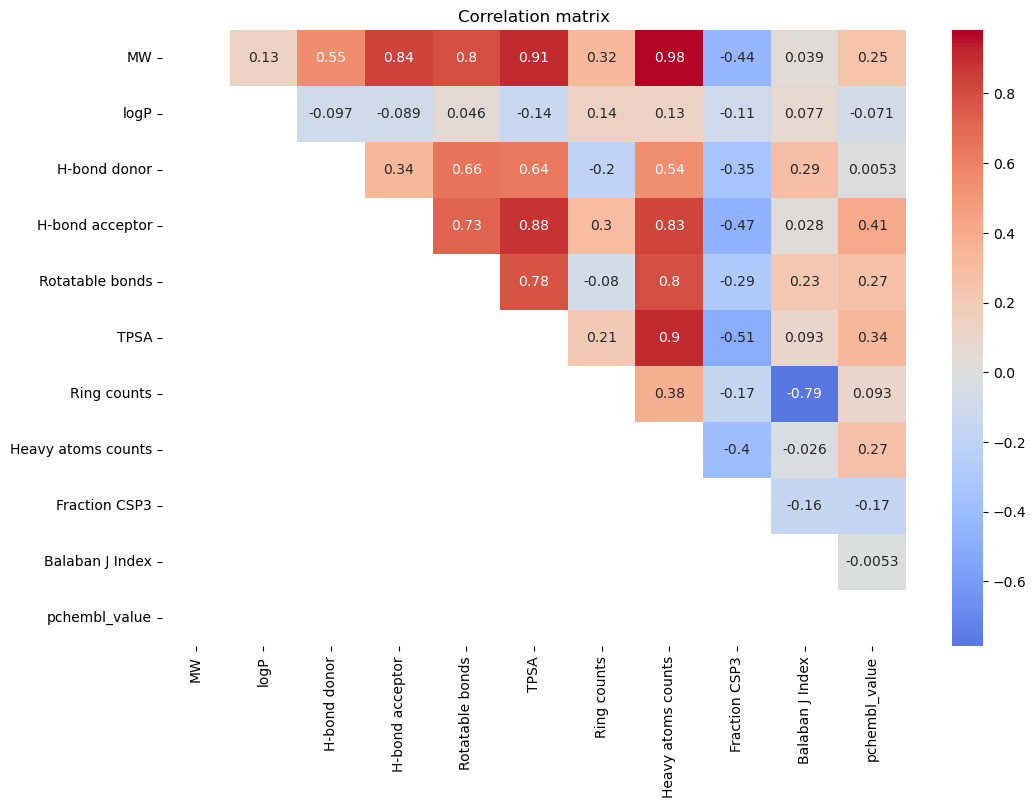

In [66]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = sig_res_predict_zinc_norm_num.corr()

# Crea una máscara triangular superior para visualizar solo la mitad superior de la matriz
mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Configura el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(mask, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation matrix')
plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/migheatmap_predict_zinc.png')
plt.show()

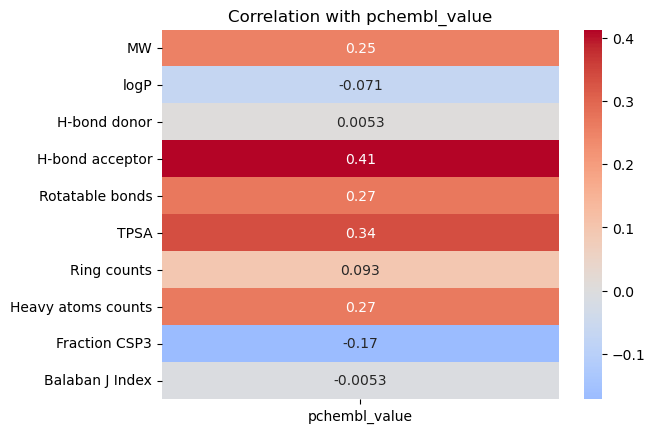

In [67]:
pchembl_corr = correlation_matrix['pchembl_value'].drop('pchembl_value')
sns.heatmap(pchembl_corr.to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title('Correlation with pchembl_value')

plt.savefig('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/cor_plot3_pchembl_predict_zinc.png')

### 1.3. ANALYSIS RELATION RESULTS

#### ChemDiv

In [68]:
#import pandas as pd

top_10_smiles_chemdiv_norm = sig_res_predict_chemdiv_norm.sort_values(by='pchembl_value', ascending=False).head(10)
print(top_10_smiles_chemdiv_norm)

                                                SMILES        MW      logP  \
184  CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...  0.419910  0.296906   
186  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.369208  0.334454   
192  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.295815  0.276790   
174  CCCC[C@H](NC(=O)O[C@H](Cn1cnc(-c2ccc(C(F)(F)F)...  0.478473  0.499127   
193  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.621141  0.441044   
181  CCCC[C@H](NC(=O)OC(C(C)C)C(C)C)C(=O)C(=O)Nc1[n...  0.390426  0.327668   
161  CC(C)c1ccc(N2C(=O)CS(=O)(=O)C23C(=O)N(Cc2cccc(...  0.385342  0.400610   
189  CCCC[C@H](NC(=O)O[C@H](Cn1ccc(-c2ccc(C(F)(F)F)...  0.587972  0.461335   
188  CC[C@H](NC(=O)[C@@H]1C[C@@H](S(=O)(=O)c2ccc(N3...  0.377901  0.233284   
165  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.373798  0.418258   

     H-bond donor  H-bond acceptor      TPSA  Rotatable bonds  Ring counts  \
184      0.333333         0.526316  0.496982         0.482759  

Obtain the CID from SMILES

In [69]:
#import pandas as pd
#import requests

def cid_smiles(dataframe, columna_smiles):
    cids = []

    for smiles in dataframe[columna_smiles]:
        # API PubChem to find SMILES
        base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
        search_url = f"{base_url}/compound/smiles/{smiles}/cids/json"

        # HTTP get
        response = requests.get(search_url)

        if response.status_code == 200:
            
            data = response.json()
            if 'IdentifierList' in data:
                cid = data['IdentifierList']['CID'][0]
                cids.append(cid)
            else:
                cids.append('NA')
        else:
            cids.append('NA')
    
    
    dataframe['CID'] = cids


dftop_chemdiv_norm = pd.DataFrame(top_10_smiles_chemdiv_norm, columns=['SMILES']) 
cid_smiles(dftop_chemdiv_norm, 'SMILES')
print(dftop_chemdiv_norm)

                                                SMILES        CID
184  CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   44389337
186  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  155512721
192  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...    9871631
174  CCCC[C@H](NC(=O)O[C@H](Cn1cnc(-c2ccc(C(F)(F)F)...   10187920
193  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   56836932
181  CCCC[C@H](NC(=O)OC(C(C)C)C(C)C)C(=O)C(=O)Nc1[n...         NA
161  CC(C)c1ccc(N2C(=O)CS(=O)(=O)C23C(=O)N(Cc2cccc(...   16024175
189  CCCC[C@H](NC(=O)O[C@H](Cn1ccc(-c2ccc(C(F)(F)F)...   10231379
188  CC[C@H](NC(=O)[C@@H]1C[C@@H](S(=O)(=O)c2ccc(N3...   71578055
165  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  145981839


Ho fem amb les dades de Zinc

In [70]:
#import pandas as pd

top_10_smiles_zinc_norm = sig_res_predict_zinc_norm.sort_values(by='pchembl_value', ascending=False).head(10)
print(top_10_smiles_zinc_norm)

                                               SMILES        MW      logP  \
79  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.150498  0.424041   
88  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.449902  0.539063   
77  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.329327  0.348080   
93  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.256525  0.421590   
63    CC(C)[C@@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C  0.143283  0.462098   
90  CCOc1ccc(C[C@H](NC(=O)c2cccc(N)c2Cl)[C@H](O)C(...  0.292807  0.457597   
57     CC(C)[C@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C  0.143283  0.462098   
72  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.326903  0.384747   
95  CC(=O)N[C@H](CS(=O)(=O)c1ccc(F)cc1)C(=O)N[C@@H...  0.260567  0.498102   
20  C[C@H](c1ccc(N(C)C)cc1)N1C(=O)N[C@H](CC2CCCCC2...  0.156213  0.466898   

    H-bond donor  H-bond acceptor  Rotatable bonds      TPSA  Ring counts  \
79      0.055556         0.388889          0.21875  0.160258        0.375  

In [71]:
df_zincid_smile1 = pd.read_csv('/Users/carlafeliu/Docs/Master/TFM/github/TFM/data/df_zincid_smile1.csv')
print(df_zincid_smile1)

                                                  SMILES    ZINC_ID
0       COc1ccc(O)c([C@H](C)NC(=O)C[C@@H](C)c2ccccc2F)c1  103528517
1                CN(Cc1ccccc1O)C(=O)c1cc(Cc2ccccc2)ccc1O  110223954
2      COc1ccc(O)c(CNC(=O)[C@@H]2C[C@@H]2c2ccc3ccccc3...  114543892
3                         O=C(NCc1ccccc1O)c1cc(Br)ccc1Cl  133782505
4          COc1ccc(O)c([C@@H](C)NC(=O)CCOc2cccc(Cl)c2)c1  157845687
...                                                  ...        ...
87271                   Cc1cccc2nc3c(ccc4ccccc43)c(C)c12    5782737
87272                C1=Cc2c(c3ccccc3c3cc4ccccc4cc23)CC1   96333663
87273                 C=Cc1ccc(-c2c3ccccc3cc3ccccc23)cc1  114353496
87274               c1ccc2c(c1)ccc1c2[nH]c2ccc3ncccc3c21    1847627
87275                  COc1cccc2cc3c(ccc4ccccc43)c(C)c12    5765051

[87276 rows x 2 columns]


In [72]:
dict_zinc_smiles = dict(zip(df_zincid_smile1['SMILES'], df_zincid_smile1['ZINC_ID']))

In [73]:
#import pandas as pd

df_zinc_norm_id = top_10_smiles_zinc_norm.copy()
#df_zinc_norm_id.pop('SMILES')
#df_zinc_norm_id.rename(columns={"Smiles": "SMILES"}, inplace=True)
df_zinc_norm_id['ZINC_ID'] = df_zinc_norm_id['SMILES'].apply(lambda x: dict_zinc_smiles.get(x, 'NA'))


print(df_zinc_norm_id)

                                               SMILES        MW      logP  \
79  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.150498  0.424041   
88  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.449902  0.539063   
77  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.329327  0.348080   
93  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.256525  0.421590   
63    CC(C)[C@@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C  0.143283  0.462098   
90  CCOc1ccc(C[C@H](NC(=O)c2cccc(N)c2Cl)[C@H](O)C(...  0.292807  0.457597   
57     CC(C)[C@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C  0.143283  0.462098   
72  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.326903  0.384747   
95  CC(=O)N[C@H](CS(=O)(=O)c1ccc(F)cc1)C(=O)N[C@@H...  0.260567  0.498102   
20  C[C@H](c1ccc(N(C)C)cc1)N1C(=O)N[C@H](CC2CCCCC2...  0.156213  0.466898   

    H-bond donor  H-bond acceptor  Rotatable bonds      TPSA  Ring counts  \
79      0.055556         0.388889          0.21875  0.160258        0.375  

In [74]:
print(df_zinc_norm_id['ZINC_ID'])

79           NA
88           NA
77           NA
93           NA
63    838486659
90           NA
57    838486658
72           NA
95           NA
20    761574593
Name: ZINC_ID, dtype: object


In [440]:
smiles10 = df_zinc_norm_id['SMILES'].tolist()
print(smiles10)

['COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2ccccc2)NC(=O)O[C@H]2CO[C@H]3OCC[C@H]32)cc1', 'CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]1CO[C@H]2OCC[C@H]21)S(=O)(=O)c1ccc([C@@H](C)O)cc1', 'CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1ccnc(Nc2ccc3sc(C)nc3c2)c1=O', 'CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]1CO[C@H]2OCC[C@H]21)S(=O)(=O)c1ccc(N)cc1', 'CC(C)[C@@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C', 'CCOc1ccc(C[C@H](NC(=O)c2cccc(N)c2Cl)[C@H](O)C(=O)N2CSC(C)(C)[C@H]2C(=O)NCc2c(C)cccc2C)cc1', 'CC(C)[C@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C', 'CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1ccnc(NCCCN2CCCC2=O)c1=O', 'CC(=O)N[C@H](CS(=O)(=O)c1ccc(F)cc1)C(=O)N[C@@H](Cc1ccccc1)[C@H](O)C(=O)N1CSC(C)(C)[C@H]1C(=O)NCc1ccccc1C', 'C[C@H](c1ccc(N(C)C)cc1)N1C(=O)N[C@H](CC2CCCCC2)C1=O']


#### SIMILARITY

In [75]:
#import pandas as pd
#from rdkit import Chem
#from rdkit.Chem import AllChem
#from rdkit.Chem import DataStructs

def calc_similarity_smiles(smiles1, smiles2):
    # Convert SMILES to RDKit molecules
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    
    if mol1 is None or mol2 is None:
        return None  
    
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2)
    
    # Tanimoto coeficient
    similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
    
    return similarity


results = []

for index1, row1 in top_10_smiles_chemdiv_norm.iterrows():
    for index2, row2 in top_10_smiles_zinc_norm.iterrows():
        sim = calc_similarity_smiles(row1['SMILES'], row2['SMILES'])
        if sim is not None:
            results.append({'SMILES_CHEMDIV': row1['SMILES'], 'SMILES_ZINC': row2['SMILES'], 'Similarity': sim})

df_similarity_predict = pd.DataFrame(results)
print(df_similarity_predict)



                                       SMILES_CHEMDIV  \
0   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
1   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
2   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
3   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
4   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
..                                                ...   
95  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
96  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
97  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
98  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
99  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   

                                          SMILES_ZINC  Similarity  
0   COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...    0.100000  
1   CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...    0.100775  
2   CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...    0.383178  
3   CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O

In [76]:
#Order to maximum similarity

df_similairty_predict = df_similarity_predict.sort_values(by="Similarity", ascending=False)

In [77]:
df_similarity_predict.to_csv('result_predict_similarity.csv', index=False)

In [78]:
df_similarity_predict

SMILES_CHEMDIV  \
0   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
1   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
2   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
3   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
4   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
..                                                ...   
95  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
96  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
97  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
98  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
99  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   

                                          SMILES_ZINC  Similarity  
0   COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...    0.100000  
1   CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...    0.100775  
2   CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...    0.383178  
3   CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...    0.101562  
4     CC(C)[C@@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C    0.116505  
..                                                ...         ...  
95  CCOc1ccc(C[C@H](NC(=O)c2cccc(N)c2Cl)[C@H](O)C(...    0.190840  
96     CC(C)[C@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C    0.163462  
97  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...    0.167939  
98  CC(=O)N[C@H](CS(=O)(=O)c1ccc(F)cc1)C(=O)N[C@@H...    0.228346  
99  C[C@H](c1ccc(N(C)C)cc1)N1C(=O)N[C@H](CC2CCCCC2...    0.119266  

[100 rows x 3 columns]

Ens quedem amb les 20 que tenen mes similitud i les estudiem

In [79]:
df_sim20_pred = df_similarity_predict.nlargest(20, 'Similarity')
print(df_sim20_pred)

                                       SMILES_CHEMDIV  \
27  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...   
22  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...   
40  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
90  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
13  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...   
11  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...   
10  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...   
43  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
41  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
93  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
91  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
7   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
2   CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...   
98  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...   
18  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...   
64  CC(C)c1ccc(N2C(=O)CS(=O)(=O)C23C(=O)N(Cc2cccc(...   
66  CC(C)c1ccc(N2C(=O)CS(=O)(=O

#### VISUAL ANALYSIS

##### ChemDiv

In [80]:

new_col= ['M' + str(i) for i in range(1, len(top_10_smiles_chemdiv_norm) +1)]
top_10_smiles_chemdiv_norm.insert(0,'Mol', new_col)
print(top_10_smiles_chemdiv_norm)

     Mol                                             SMILES        MW  \
184   M1  CCCCN(C)CNCC(=O)[C@H](CC(=O)O)NC(=O)C(CC)n1ccn...  0.419910   
186   M2  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.369208   
192   M3  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.295815   
174   M4  CCCC[C@H](NC(=O)O[C@H](Cn1cnc(-c2ccc(C(F)(F)F)...  0.478473   
193   M5  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.621141   
181   M6  CCCC[C@H](NC(=O)OC(C(C)C)C(C)C)C(=O)C(=O)Nc1[n...  0.390426   
161   M7  CC(C)c1ccc(N2C(=O)CS(=O)(=O)C23C(=O)N(Cc2cccc(...  0.385342   
189   M8  CCCC[C@H](NC(=O)O[C@H](Cn1ccc(-c2ccc(C(F)(F)F)...  0.587972   
188   M9  CC[C@H](NC(=O)[C@@H]1C[C@@H](S(=O)(=O)c2ccc(N3...  0.377901   
165  M10  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.373798   

         logP  H-bond donor  H-bond acceptor      TPSA  Rotatable bonds  \
184  0.296906      0.333333         0.526316  0.496982         0.482759   
186  0.334454      0.333333         0.421053  

In [83]:
#import pandas as pd
#from rdkit import Chem
#from rdkit.Chem import Draw
#from PIL import Image, ImageDraw

def draw_molec(df, column_smiles):
    imag = []
    for index, row in df.iterrows():
        smiles = row[column_smiles]
        mol = Chem.MolFromSmiles(smiles)

        if mol is not None:
            img = Draw.MolToImage(mol, size=(300, 300))
            imag.append(img)

    return imag


imag_molecules = draw_molec(top_10_smiles_chemdiv_norm, 'SMILES')

# Create an image
num_columns = 5
num_rows = 2
width_ind = 300
height_ind = 300
width_total = num_columns * width_ind
height_total = num_rows * height_ind

imag_total = Image.new('RGB', (width_total , height_total), (255, 255, 255))
draw = ImageDraw.Draw(imag_total)

for i, img in enumerate(imag_molecules):
    row = i // num_columns
    column = i % num_columns
    x = column * width_ind
    y = row * height_ind
    imag_total.paste(img, (x, y))

    # SMILES under molecules
    smiles = top_10_smiles_chemdiv_norm.iloc[i]['Mol']
    text_y_position = y + height_ind - 30  
    draw.text((x + width_ind // 2 - 50, text_y_position), smiles, fill=(0, 0, 0))

imag_total.save('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/top10_mol_chemdiv.png')
# Mostrar la imagen compuesta
imag_total.show()


##### Zinc

In [84]:

new_col= ['M' + str(i) for i in range(1, len(top_10_smiles_zinc_norm) +1)]
top_10_smiles_zinc_norm.insert(0,'Mol', new_col)
print(top_10_smiles_zinc_norm)

    Mol                                             SMILES        MW  \
79   M1  COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...  0.150498   
88   M2  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.449902   
77   M3  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.329327   
93   M4  CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...  0.256525   
63   M5    CC(C)[C@@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C  0.143283   
90   M6  CCOc1ccc(C[C@H](NC(=O)c2cccc(N)c2Cl)[C@H](O)C(...  0.292807   
57   M7     CC(C)[C@H]1N(C(=O)NCc2ccc(N3CC=CC3)cc2)CC1(C)C  0.143283   
72   M8  CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...  0.326903   
95   M9  CC(=O)N[C@H](CS(=O)(=O)c1ccc(F)cc1)C(=O)N[C@@H...  0.260567   
20  M10  C[C@H](c1ccc(N(C)C)cc1)N1C(=O)N[C@H](CC2CCCCC2...  0.156213   

        logP  H-bond donor  H-bond acceptor  Rotatable bonds      TPSA  \
79  0.424041      0.055556         0.388889          0.21875  0.160258   
88  0.539063      0.166667         0.555556          0.4687

In [85]:
#import pandas as pd
#from rdkit import Chem
#from rdkit.Chem import Draw
#from PIL import Image, ImageDraw

def draw_molec(df, column_smiles):
    imag = []
    for index, row in df.iterrows():
        smiles = row[column_smiles]
        mol = Chem.MolFromSmiles(smiles)

        if mol is not None:
            img = Draw.MolToImage(mol, size=(300, 300))
            imag.append(img)

    return imag


imag_molecules = draw_molec(top_10_smiles_zinc_norm, 'SMILES')

num_columns = 5
num_rows = 2
width_ind = 300
height_ind = 300
width_total = num_columns * width_ind
height_total = num_rows * height_ind

imag_total = Image.new('RGB', (width_total, height_total), (255, 255, 255))
draw = ImageDraw.Draw(imag_total)

for i, img in enumerate(imag_molecules):
    row = i // num_columns
    column = i % num_columns
    x = column * width_ind
    y = row * height_ind
    imag_total.paste(img, (x, y))

    # SMILES under mol
    smiles = top_10_smiles_zinc_norm.iloc[i]['Mol']
    text_y_position = y + height_ind - 30  
    draw.text((x + width_ind// 2 - 50, text_y_position), smiles, fill=(0, 0, 0))

imag_total.save('/Users/carlafeliu/Docs/Master/TFM/github/TFM/output/top10_mol_zinc.png')
# Mostrar la imagen compuesta
imag_total.show()